In [50]:
%run 'malaria_functions.ipynb'

from __future__ import absolute_import, division, print_function, unicode_literals
import os
import sys
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
random.seed(1)

In [51]:
#Loading data with compounds IDs, SMILES and information about their activity
osm_list = reading_csv()
osm_cleaned = data_preproc(osm_list)
osm_cleaned = osm_cleaned.reset_index(drop=True)

Number of instances of each level of ION_ACTIVITY 
 0.0    395
1.0     55
0.5      5
Name: ION_ACTIVITY, dtype: int64


In [52]:
print ("Number of instances of each level of ION_ACTIVITY", "\n", osm_cleaned['ION_ACTIVITY'].value_counts())

Number of instances of each level of ION_ACTIVITY 
 0.0    395
1.0     55
0.5      5
Name: ION_ACTIVITY, dtype: int64


In [53]:
osm_series4 = series4_cmp(osm_cleaned)

Number of instances of each level of ION_ACTIVITY 
 1.0    23
0.0    17
0.5     4
Name: ION_ACTIVITY, dtype: int64


In [54]:
osm_series4 = osm_series4.drop(osm_series4.index[6])

In [55]:
# Storing the result of a inner merge from both dataframes
common = osm_cleaned.merge(osm_series4, on=['SMILES'])
# Selecting the rows when one column's values are not in this common
osm_train = osm_cleaned[(~osm_cleaned.loc[:,'SMILES'].isin(common.loc[:,'SMILES']))]
osm_train = osm_train.reset_index(drop=True)

In [56]:
osm_series4['TYPE'] = "Series_4"
osm_series4

,ID,SMILES,ION_ACTIVITY,TEST_SET,PvsP,pEC50,ORIGIN,TYPE
0,OSM-S-175,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,B,0.347500,-0.459045,OSM S4,Series_4
1,OSM-S-177,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,A,10.000000,1.000000,OSM S4,Series_4
2,OSM-S-201,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,B,4.595600,0.662342,OSM S4,Series_4
3,OSM-S-202,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,A,0.211000,-0.675718,OSM S4,Series_4
4,OSM-S-204,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,B,0.901800,-0.044890,OSM S4,Series_4
5,OSM-S-218,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,B,0.110500,-0.956638,OSM S4,Series_4
7,OSM-S-254,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,0.5,B,0.774400,-0.111035,OSM S4,Series_4
8,OSM-S-272,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,1.0,B,0.107800,-0.967381,OSM S4,Series_4
9,OSM-S-278,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,0.5,B,4.215400,0.624839,OSM S4,Series_4
10,OSM-S-279,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CC=C(OC(F)F...,1.0,B,0.314275,-0.502690,OSM S4,Series_4


In [57]:
osm_train['TYPE']= "No_Series_4"
osm_train

,ID,SMILES,ION_ACTIVITY,TEST_SET,PvsP,pEC50,TYPE
0,OSM-S-106,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,0.0,A,NaN,NaN,No_Series_4
1,OSM-S-111,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,0.0,A,0.165667,-0.780765,No_Series_4
2,OSM-S-35,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,A,0.025000,-1.602060,No_Series_4
3,OSM-S-4,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,0.0,A,50.000000,1.698970,No_Series_4
4,OSM-S-5,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,0.0,A,0.515000,-0.288193,No_Series_4
5,OSM-S-51,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,A,0.277000,-0.557520,No_Series_4
6,MMV019066,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,0.0,M,0.140000,-0.853872,No_Series_4
7,MMV665941,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,0.0,M,0.255000,-0.593460,No_Series_4
8,MMV396680,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,0.0,M,0.092800,-1.032452,No_Series_4
9,MMV666601,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,0.0,M,0.154000,-0.812479,No_Series_4


In [58]:
#osm_train = osm_train.drop(['TEST_SET','PvsP','pEC50', 'ID'], axis=1)
#osm_train
osm_series4 = osm_series4.drop(['TEST_SET','PvsP','pEC50', 'ORIGIN', 'ID'], axis=1)

In [59]:
osm_series4

,SMILES,ION_ACTIVITY,TYPE
0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,Series_4
1,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,Series_4
2,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,Series_4
3,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,Series_4
4,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,Series_4
5,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,Series_4
7,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,0.5,Series_4
8,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,1.0,Series_4
9,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,0.5,Series_4
10,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CC=C(OC(F)F...,1.0,Series_4


In [165]:
mix = None
mix = pd.concat([osm_train, osm_series4], axis=0)

In [166]:
mix

,ID,ION_ACTIVITY,PvsP,SMILES,TEST_SET,TYPE,pEC50
0,OSM-S-106,0.0,NaN,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,A,No_Series_4,NaN
1,OSM-S-111,0.0,0.165667,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,A,No_Series_4,-0.780765
2,OSM-S-35,0.0,0.025000,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,A,No_Series_4,-1.602060
3,OSM-S-4,0.0,50.000000,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,A,No_Series_4,1.698970
4,OSM-S-5,0.0,0.515000,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,A,No_Series_4,-0.288193
5,OSM-S-51,0.0,0.277000,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,A,No_Series_4,-0.557520
6,MMV019066,0.0,0.140000,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,M,No_Series_4,-0.853872
7,MMV665941,0.0,0.255000,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,M,No_Series_4,-0.593460
8,MMV396680,0.0,0.092800,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,M,No_Series_4,-1.032452
9,MMV666601,0.0,0.154000,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,M,No_Series_4,-0.812479


In [167]:
mix = mix.reset_index(drop=True)
mix

,ID,ION_ACTIVITY,PvsP,SMILES,TEST_SET,TYPE,pEC50
0,OSM-S-106,0.0,NaN,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,A,No_Series_4,NaN
1,OSM-S-111,0.0,0.165667,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,A,No_Series_4,-0.780765
2,OSM-S-35,0.0,0.025000,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,A,No_Series_4,-1.602060
3,OSM-S-4,0.0,50.000000,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,A,No_Series_4,1.698970
4,OSM-S-5,0.0,0.515000,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,A,No_Series_4,-0.288193
5,OSM-S-51,0.0,0.277000,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,A,No_Series_4,-0.557520
6,MMV019066,0.0,0.140000,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,M,No_Series_4,-0.853872
7,MMV665941,0.0,0.255000,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,M,No_Series_4,-0.593460
8,MMV396680,0.0,0.092800,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,M,No_Series_4,-1.032452
9,MMV666601,0.0,0.154000,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,M,No_Series_4,-0.812479


In [62]:
osm_fp = fingerprint_desc(mix)
osm_sp = spectrophores(mix)

In [86]:
osm_fp

,ION_ACTIVITY,SMILES,ecfp6,fcfp6,hashap,hashtt,maccs,rdk7,ecfp6_648,ecfp6_969,...,ecfp6_599,ecfp6_596,ecfp6_597,ecfp6_594,ecfp6_595,ecfp6_592,ecfp6_593,ecfp6_590,ecfp6_591,TYPE
0,0.0,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 

In [168]:
mix["TYPE"] = np.where(mix["TYPE"].str.contains("No_Series_4"), 0, 1)

In [169]:
#mix.reset_index(drop=True)
mix

,ID,ION_ACTIVITY,PvsP,SMILES,TEST_SET,TYPE,pEC50
0,OSM-S-106,0.0,NaN,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,A,0,NaN
1,OSM-S-111,0.0,0.165667,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,A,0,-0.780765
2,OSM-S-35,0.0,0.025000,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,A,0,-1.602060
3,OSM-S-4,0.0,50.000000,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,A,0,1.698970
4,OSM-S-5,0.0,0.515000,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,A,0,-0.288193
5,OSM-S-51,0.0,0.277000,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,A,0,-0.557520
6,MMV019066,0.0,0.140000,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,M,0,-0.853872
7,MMV665941,0.0,0.255000,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,M,0,-0.593460
8,MMV396680,0.0,0.092800,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,M,0,-1.032452
9,MMV666601,0.0,0.154000,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,M,0,-0.812479


In [112]:
osm_fp.reset_index()

,index,ION_ACTIVITY,SMILES,ecfp6,fcfp6,hashap,hashtt,maccs,rdk7,ecfp6_648,...,ecfp6_599,ecfp6_596,ecfp6_597,ecfp6_594,ecfp6_595,ecfp6_592,ecfp6_593,ecfp6_590,ecfp6_591,TYPE
0,0,0.0,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,0.0,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,0.0,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.0,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0.0,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,0.0,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",

In [127]:
osm_fp['TYPE']=mix['TYPE']

In [132]:
pd.to_numeric(osm_fp['TYPE'])

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
425    1
426    1
427    1
428    1
429    1
430    1
431    1
432    1
433    1
434    1
435    1
436    1
437    1
438    1
439    1
440    1
441    1
442    1
443    1
444    1
445    1
446    1
447    1
448    1
449    1
450    1
451    1
452    1
453    1
454    1
Name: TYPE, dtype: int64

In [133]:
#ECFP6

fp = 'ecfp6'
df_new = osm_fp

In [137]:
from sklearn.decomposition import PCA

#fp_individual adaptation

df_new = df_new.loc[:,('SMILES', 'MOLECULES', 'ION_ACTIVITY', 'TYPE', fp)]
for index, row in df_new.iterrows():
    name_fp = [j+"_"+str(i) for i, j in zip(range(1,nbits+1), [fp]*(nbits+1))]
    hey = df_new.loc[index, fp]
    fps = {n: d for n, d in zip(name_fp, hey)}
    for key in fps.keys():
        df_new.loc[index, key] = fps[key]


In [138]:
dfi_new = df_new.drop(df_new[df_new.ION_ACTIVITY == 0.5].index)
dfi_new = dfi_new.drop(['SMILES', 'MOLECULES', fp], axis=1)
# Removing non-numeric variables
npdesc = dfi_new.drop(['ION_ACTIVITY', 'TYPE'], axis=1).values
labdesc = dfi_new.ix[:, "ION_ACTIVITY"].values
typedesc = dfi_new.ix[:,"TYPE"].values    

npdesc = preprocessing.scale(npdesc)

In [139]:
typedesc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

Explained variance by principal components are [ 0.0234138   0.01321973]


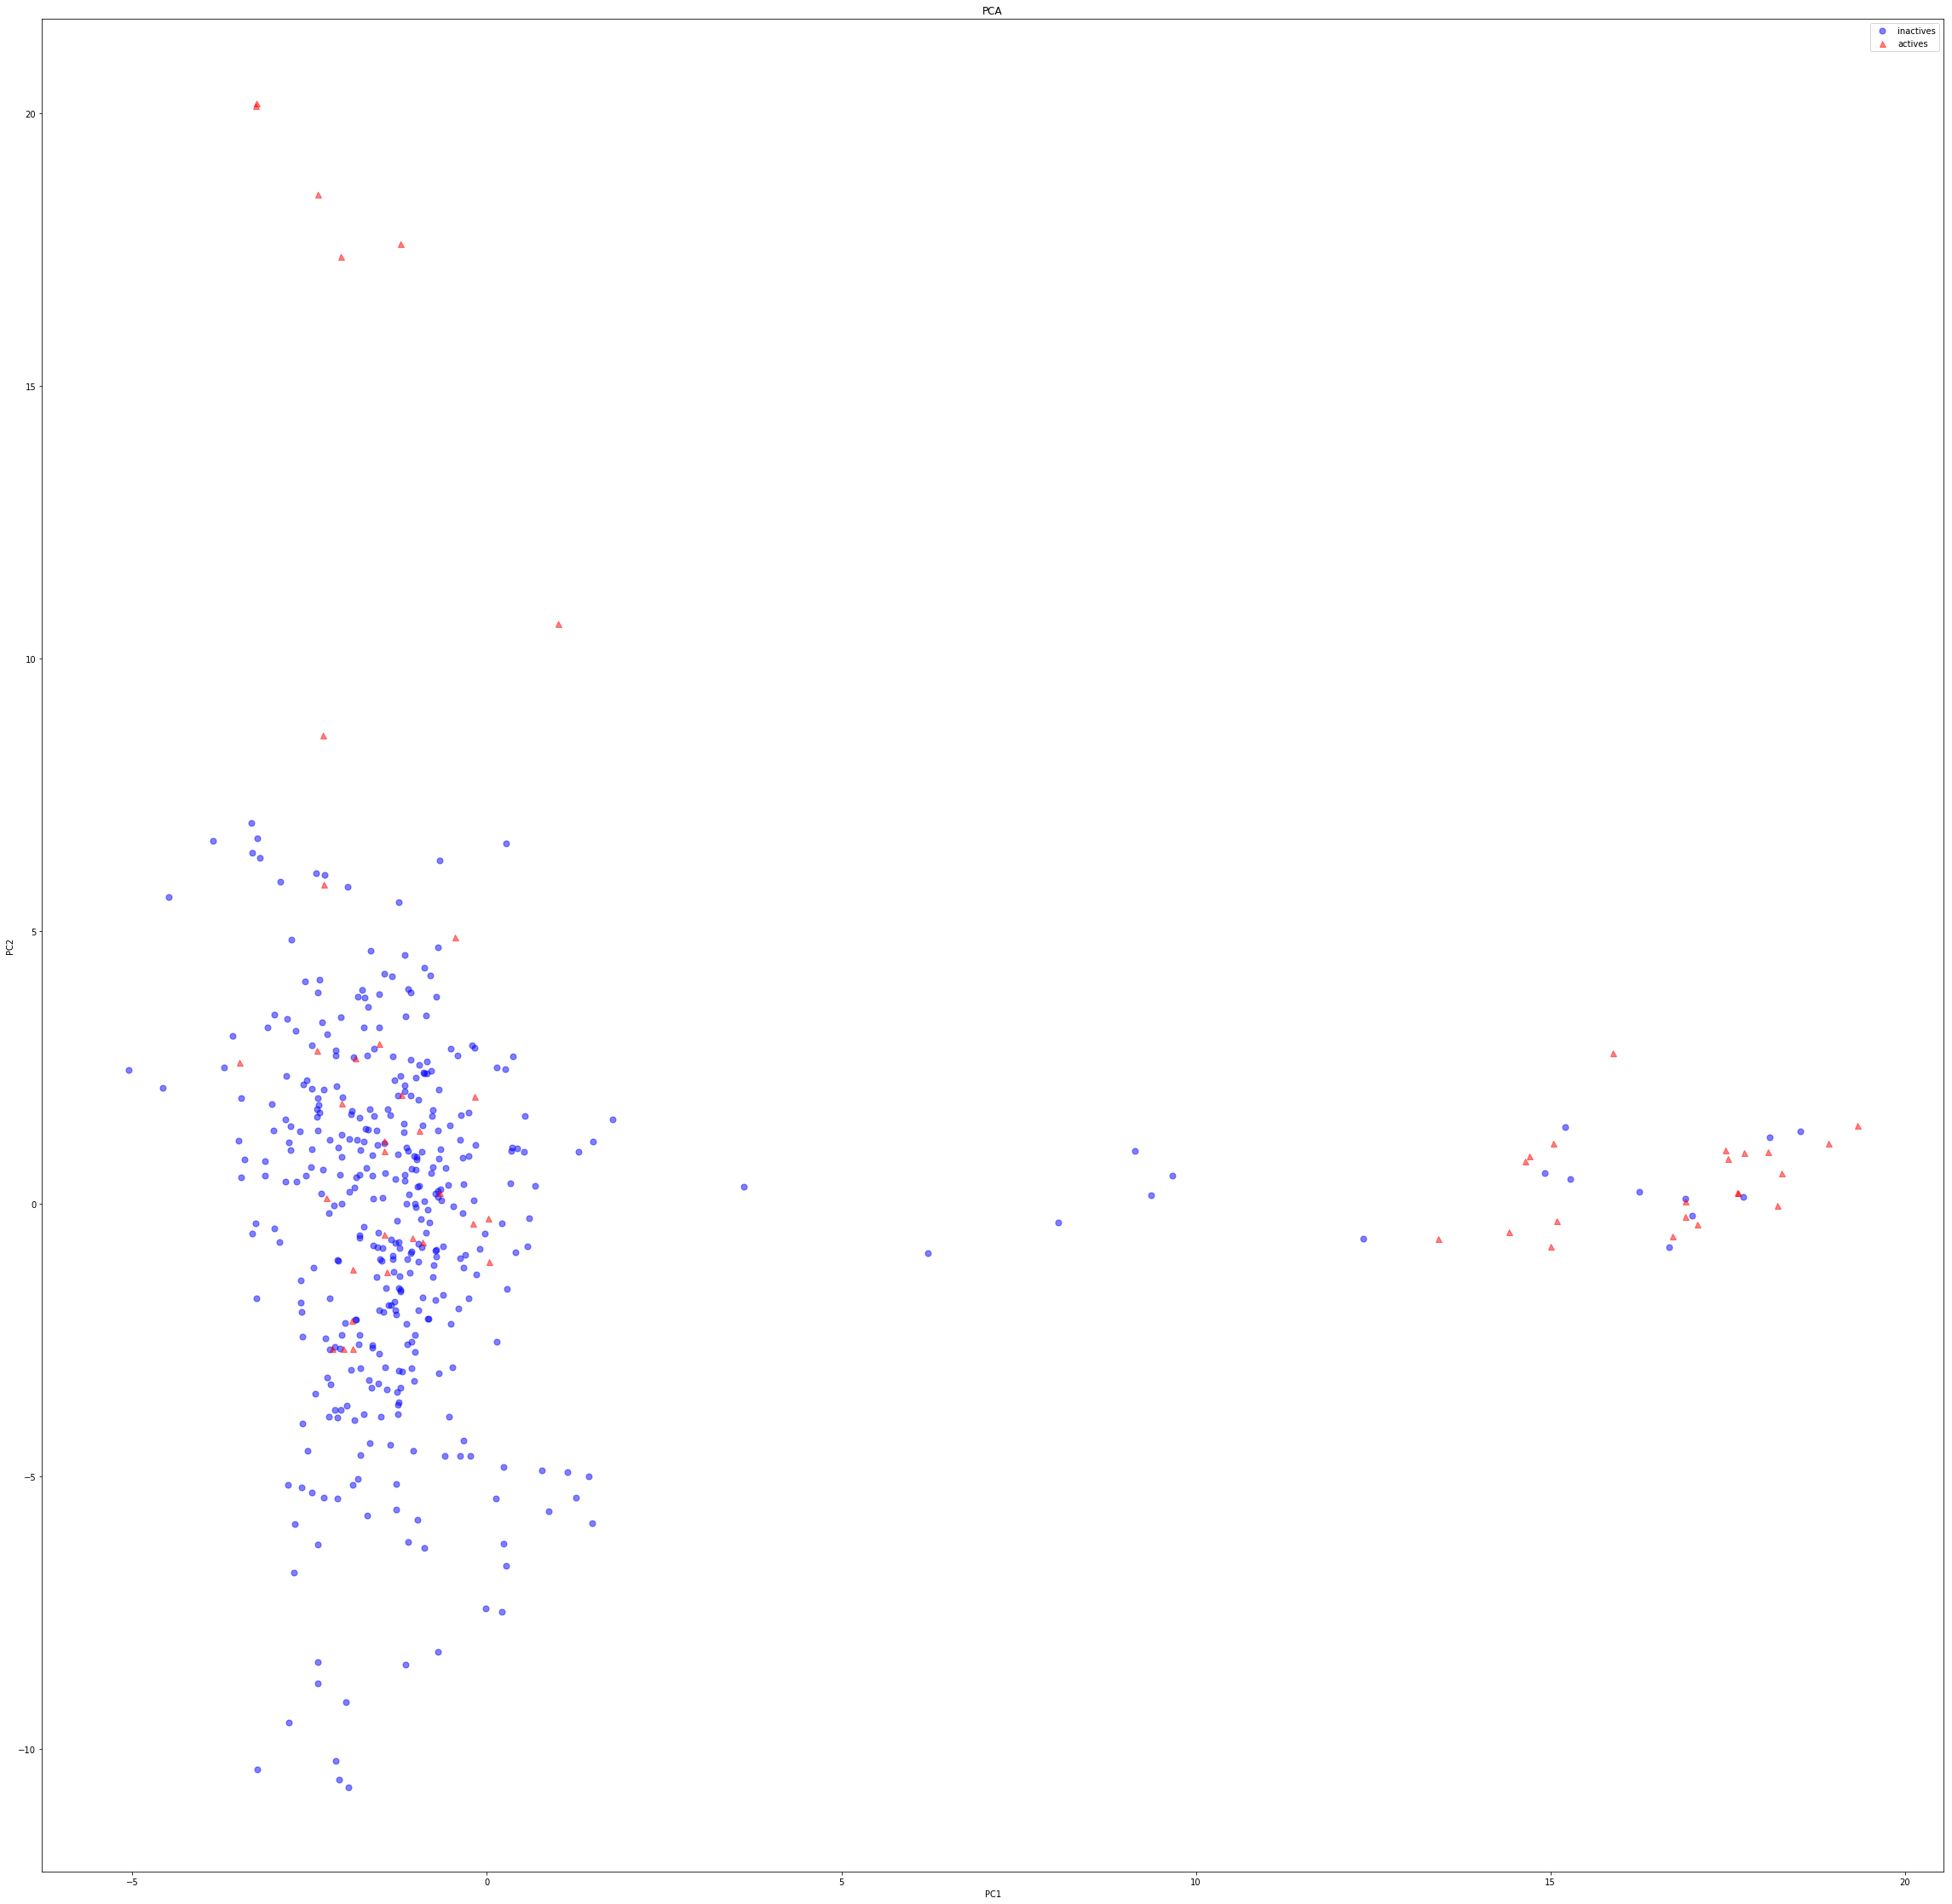

In [140]:
   
pca = PCA(n_components=2)
    
pc_tr = pca.fit_transform(npdesc)
    
print("Explained variance by principal components are %s" % pca.explained_variance_ratio_)
pca_tr_l = np.concatenate((pc_tr, labdesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='inactives')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='actives')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

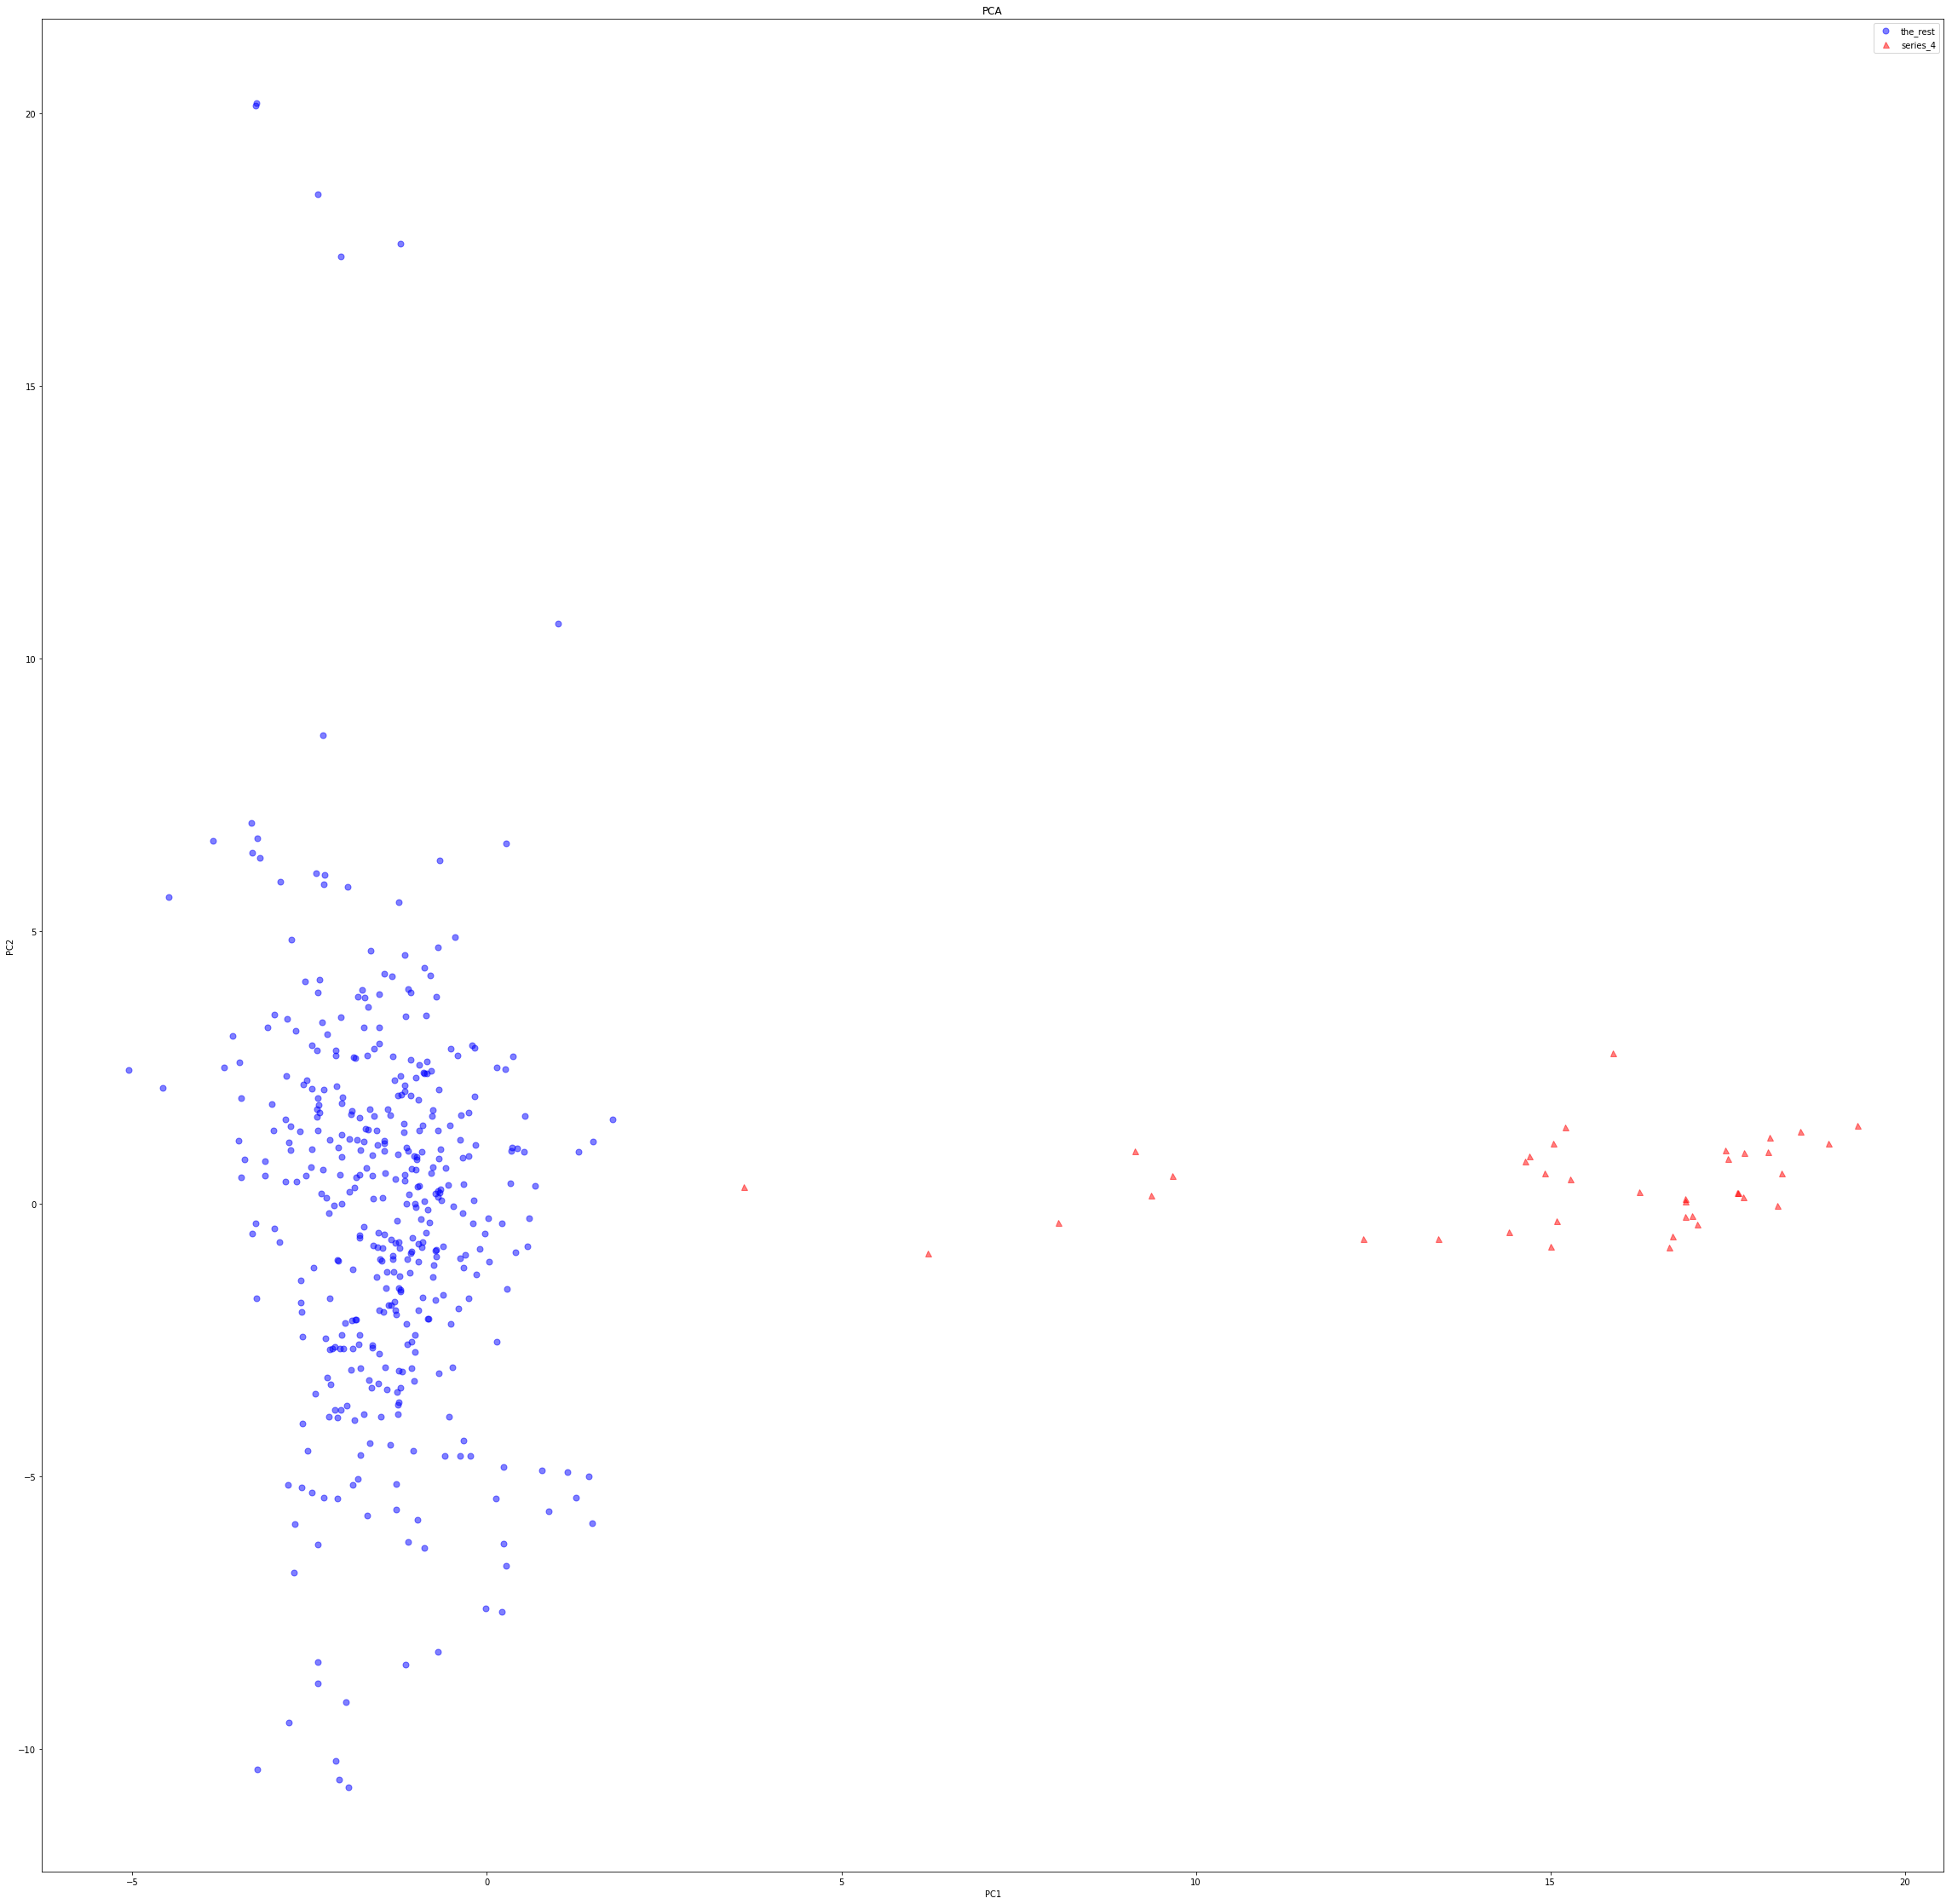

In [141]:
pca_tr_l = np.concatenate((pc_tr, typedesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='the_rest')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='series_4')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

In [143]:
fp = 'fcfp6'
df_new = osm_fp

from sklearn.decomposition import PCA

#fp_individual adaptation

df_new = df_new.loc[:,('SMILES', 'MOLECULES', 'ION_ACTIVITY', 'TYPE', fp)]
for index, row in df_new.iterrows():
    name_fp = [j+"_"+str(i) for i, j in zip(range(1,nbits+1), [fp]*(nbits+1))]
    hey = df_new.loc[index, fp]
    fps = {n: d for n, d in zip(name_fp, hey)}
    for key in fps.keys():
        df_new.loc[index, key] = fps[key]
        

dfi_new = df_new.drop(df_new[df_new.ION_ACTIVITY == 0.5].index)
dfi_new = dfi_new.drop(['SMILES', 'MOLECULES', fp], axis=1)
# Removing non-numeric variables
npdesc = dfi_new.drop(['ION_ACTIVITY', 'TYPE'], axis=1).values
labdesc = dfi_new.ix[:, "ION_ACTIVITY"].values
typedesc = dfi_new.ix[:,"TYPE"].values    

npdesc = preprocessing.scale(npdesc)

Explained variance by principal components are [ 0.02264688  0.01470217]


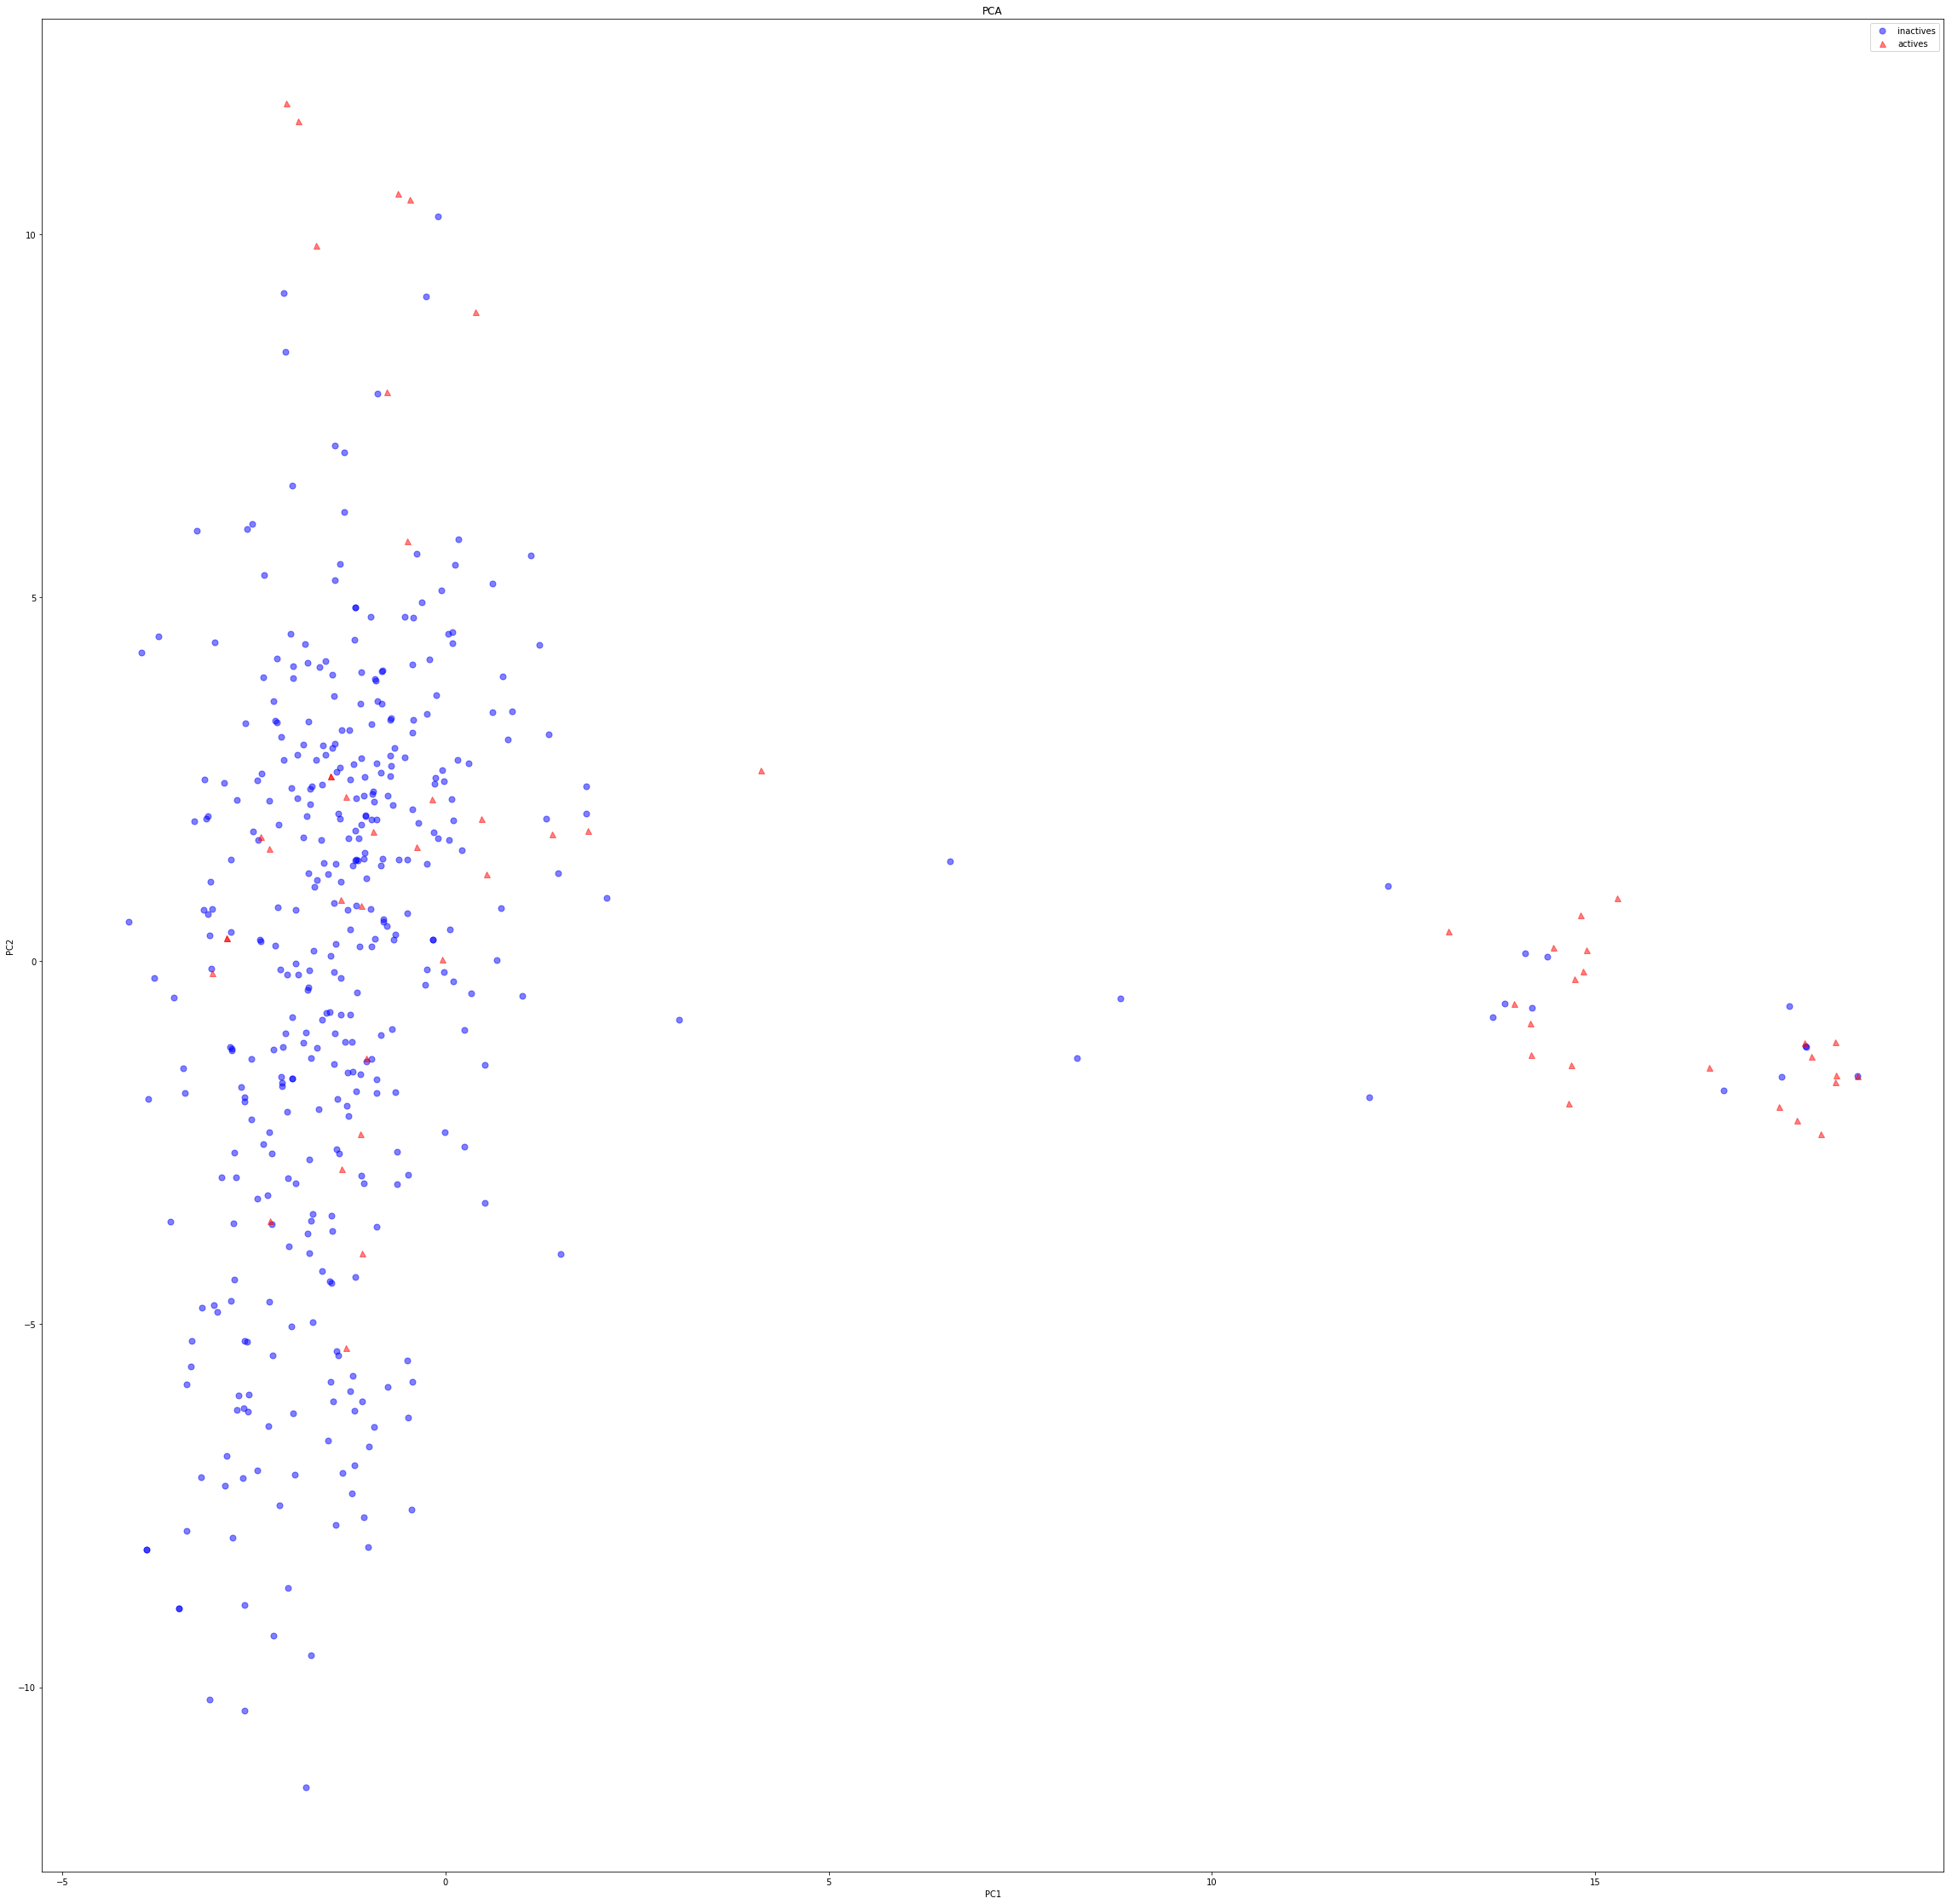

In [144]:
pca = PCA(n_components=2)
    
pc_tr = pca.fit_transform(npdesc)
    
print("Explained variance by principal components are %s" % pca.explained_variance_ratio_)
pca_tr_l = np.concatenate((pc_tr, labdesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='inactives')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='actives')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

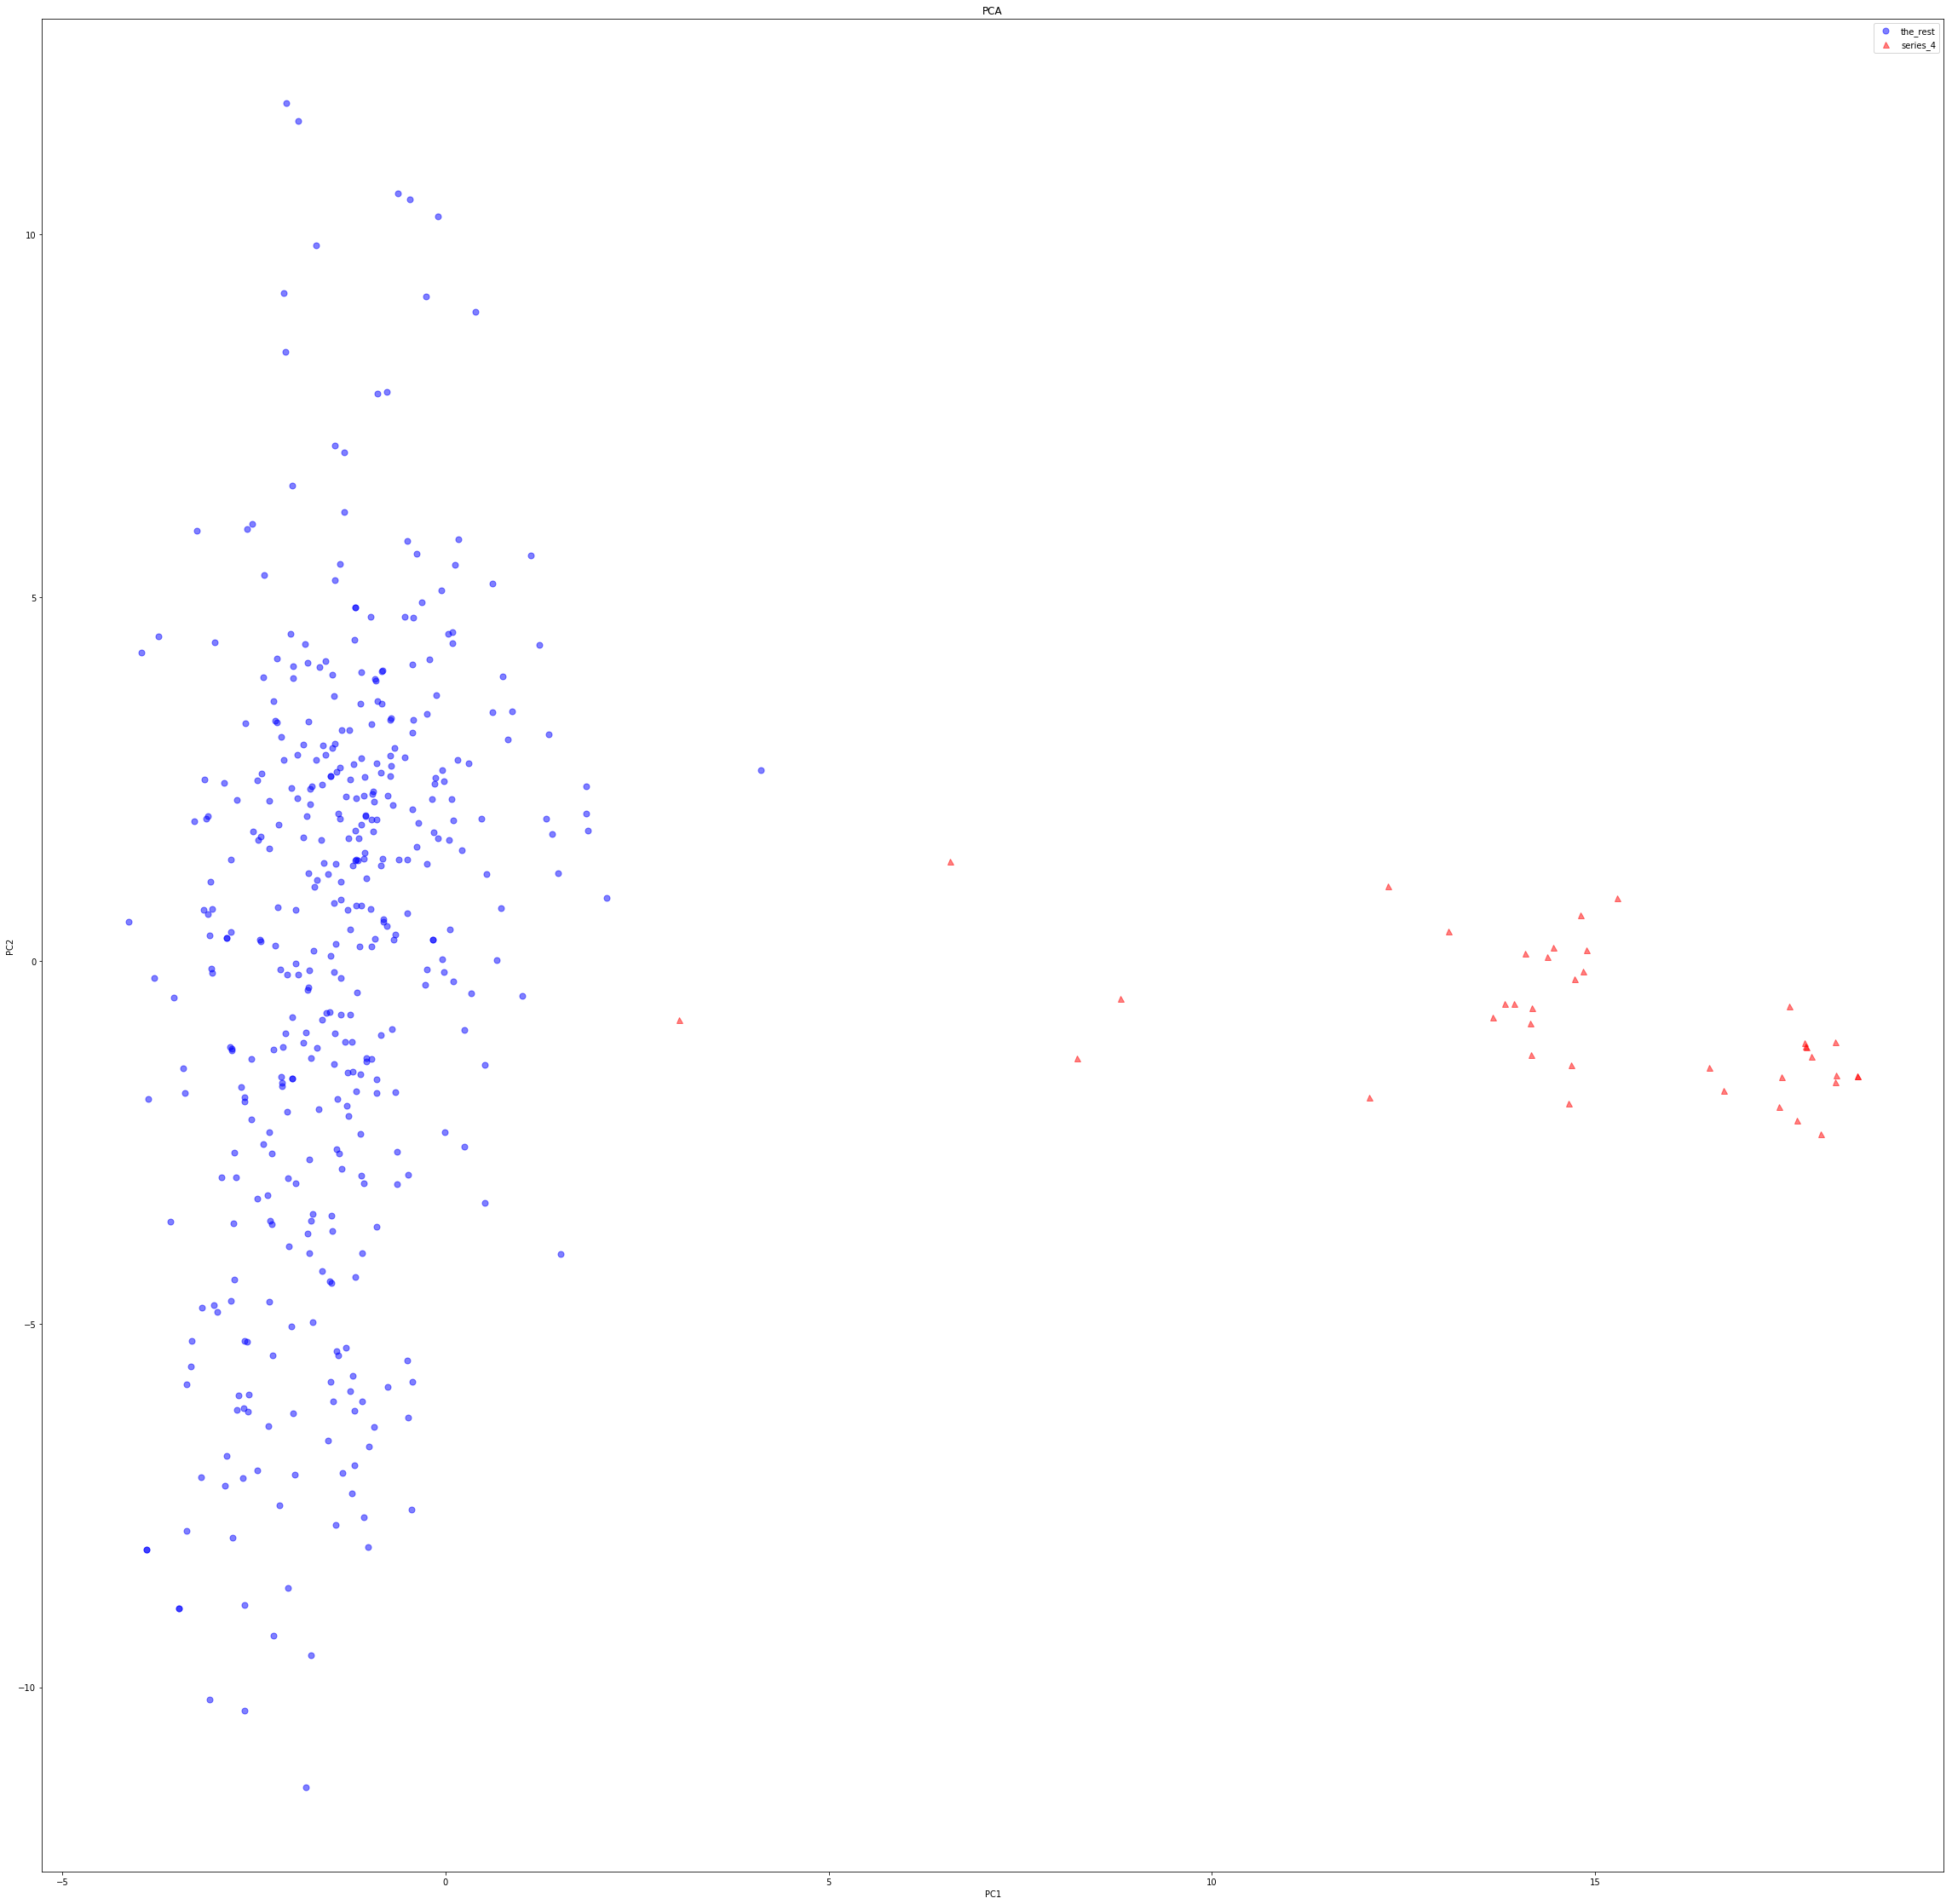

In [145]:
pca_tr_l = np.concatenate((pc_tr, typedesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='the_rest')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='series_4')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

In [147]:
fp = 'maccs'
df_new = osm_fp

#fp_individual adaptation

df_new = df_new.loc[:,('SMILES', 'MOLECULES', 'ION_ACTIVITY', 'TYPE', fp)]
for index, row in df_new.iterrows():
    name_fp = [j+"_"+str(i) for i, j in zip(range(1,nbits+1), [fp]*(nbits+1))]
    hey = df_new.loc[index, fp]
    fps = {n: d for n, d in zip(name_fp, hey)}
    for key in fps.keys():
        df_new.loc[index, key] = fps[key]
        

dfi_new = df_new.drop(df_new[df_new.ION_ACTIVITY == 0.5].index)
dfi_new = dfi_new.drop(['SMILES', 'MOLECULES', fp], axis=1)
# Removing non-numeric variables
npdesc = dfi_new.drop(['ION_ACTIVITY', 'TYPE'], axis=1).values
labdesc = dfi_new.ix[:, "ION_ACTIVITY"].values
typedesc = dfi_new.ix[:,"TYPE"].values    

npdesc = preprocessing.scale(npdesc)

Explained variance by principal components are [ 0.09209396  0.07584426]


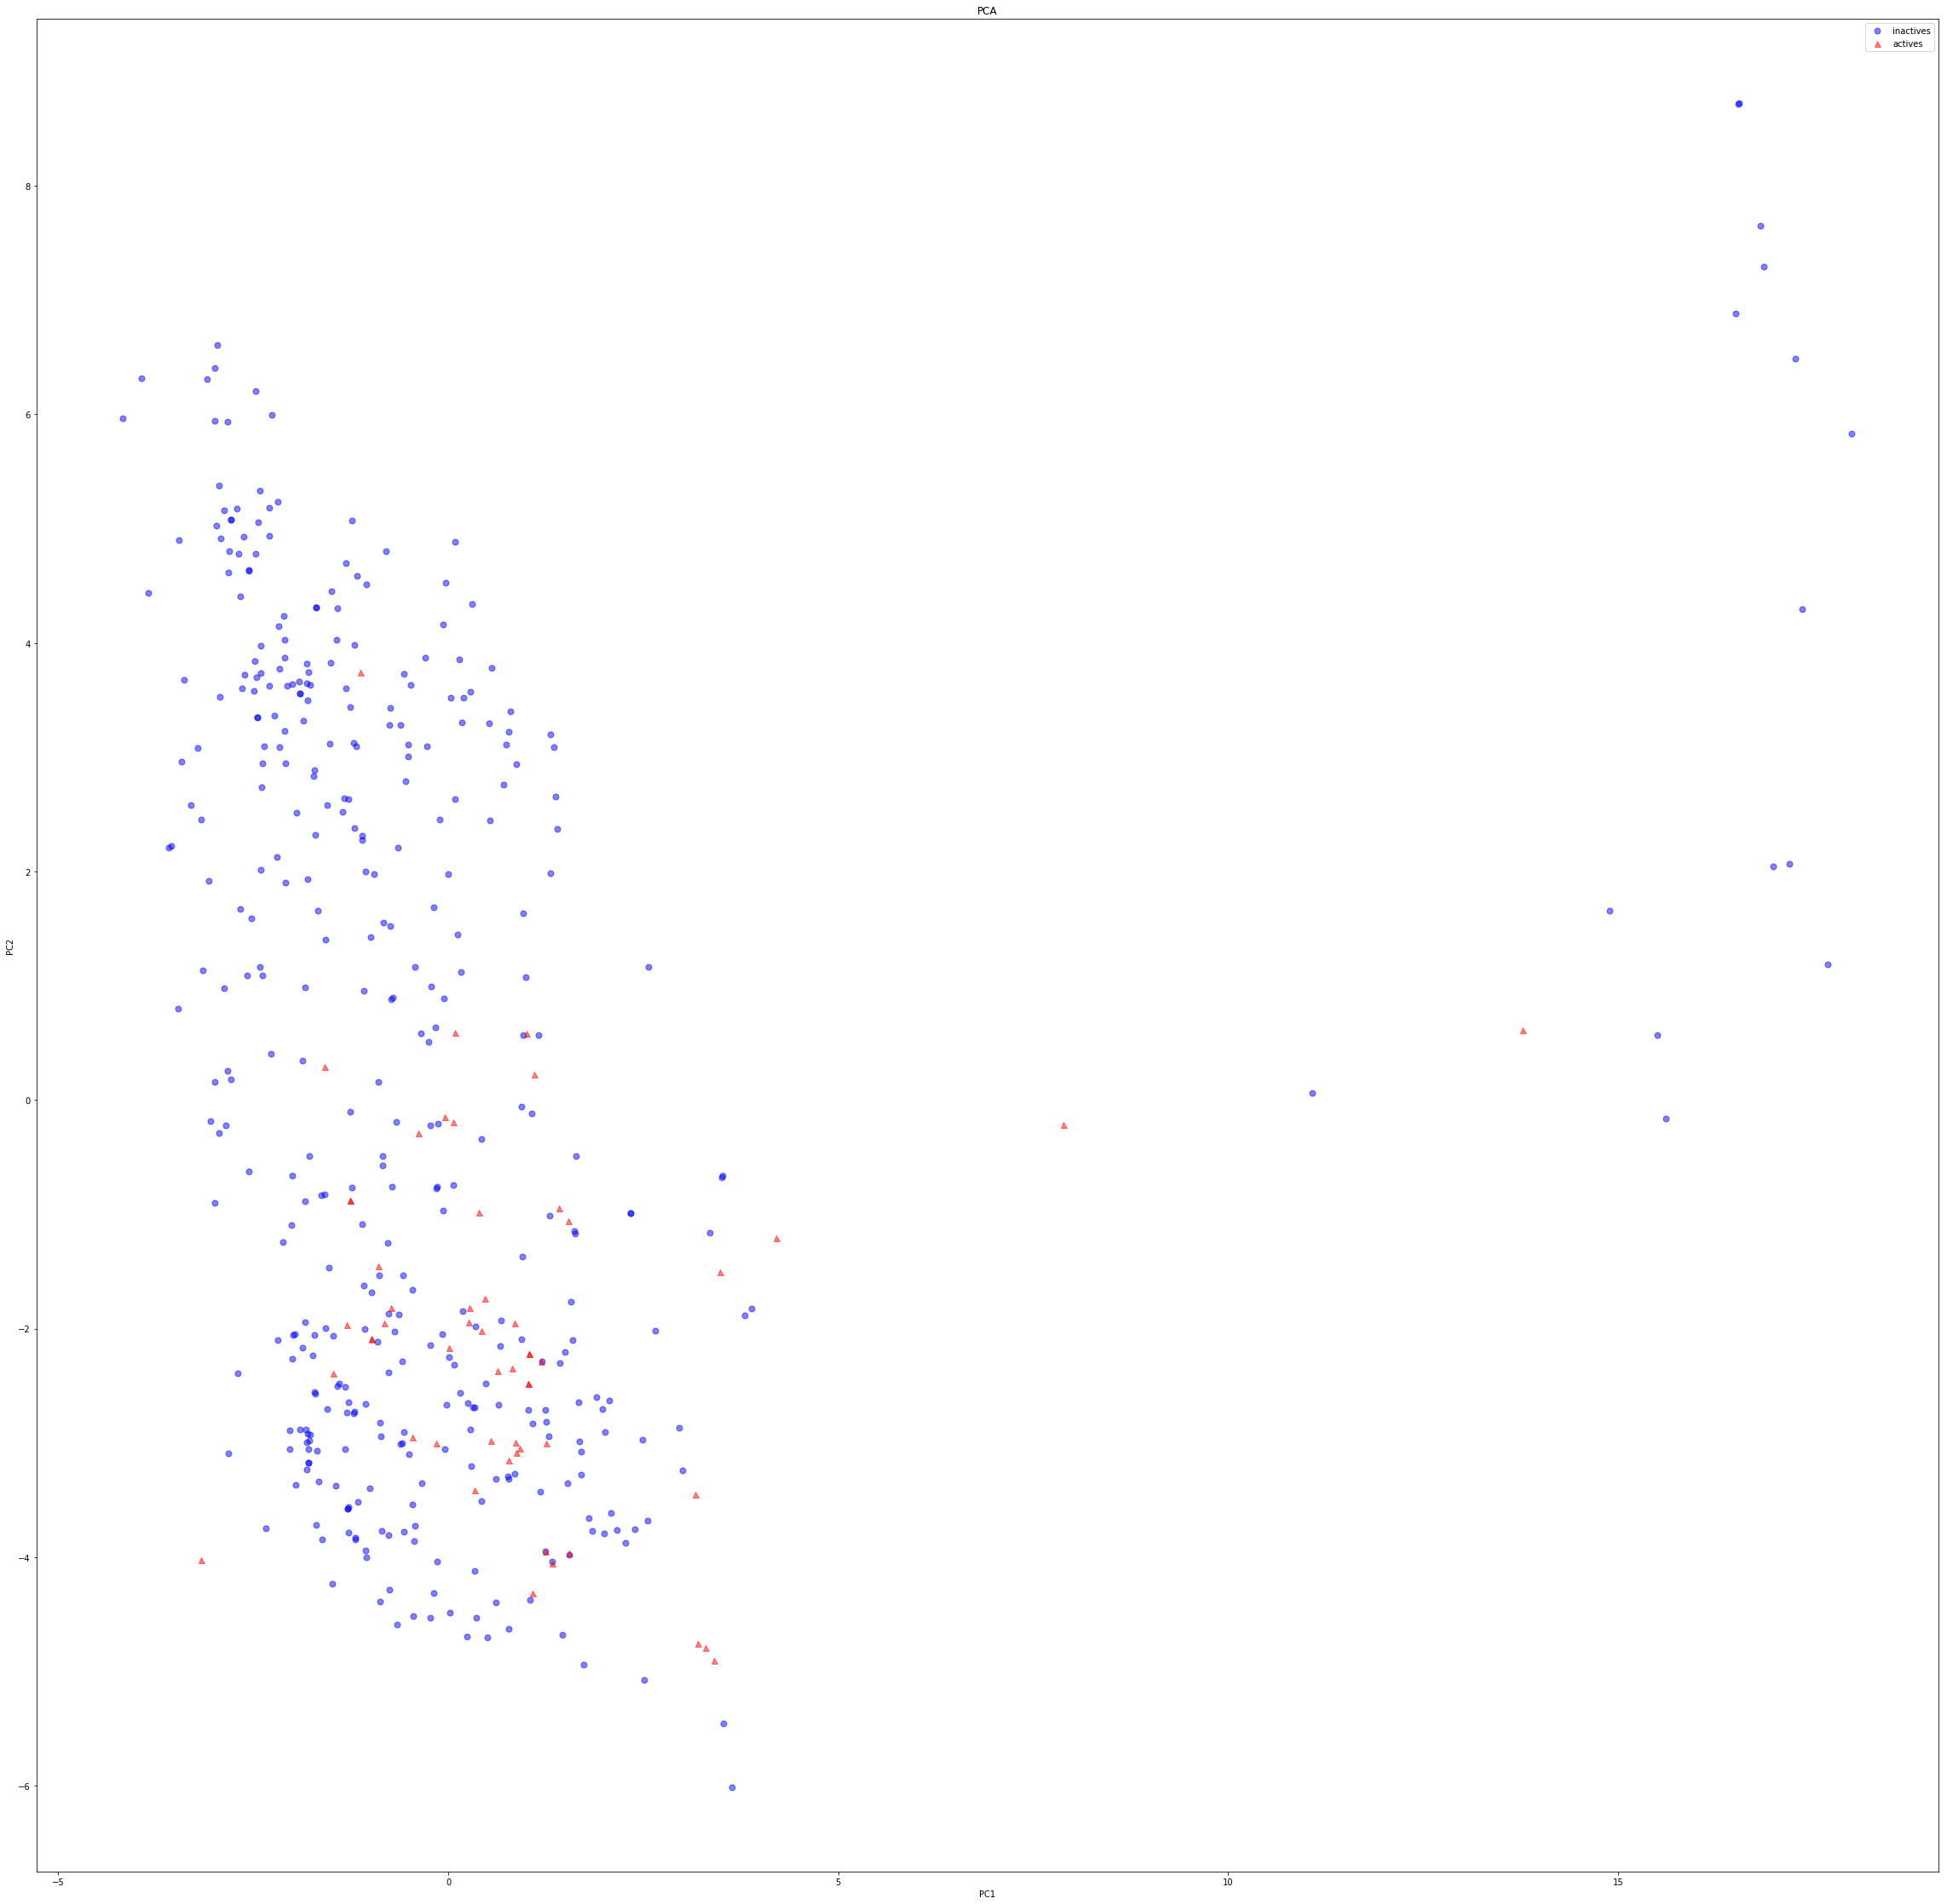

In [148]:
pca = PCA(n_components=2)
    
pc_tr = pca.fit_transform(npdesc)
    
print("Explained variance by principal components are %s" % pca.explained_variance_ratio_)
pca_tr_l = np.concatenate((pc_tr, labdesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='inactives')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='actives')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

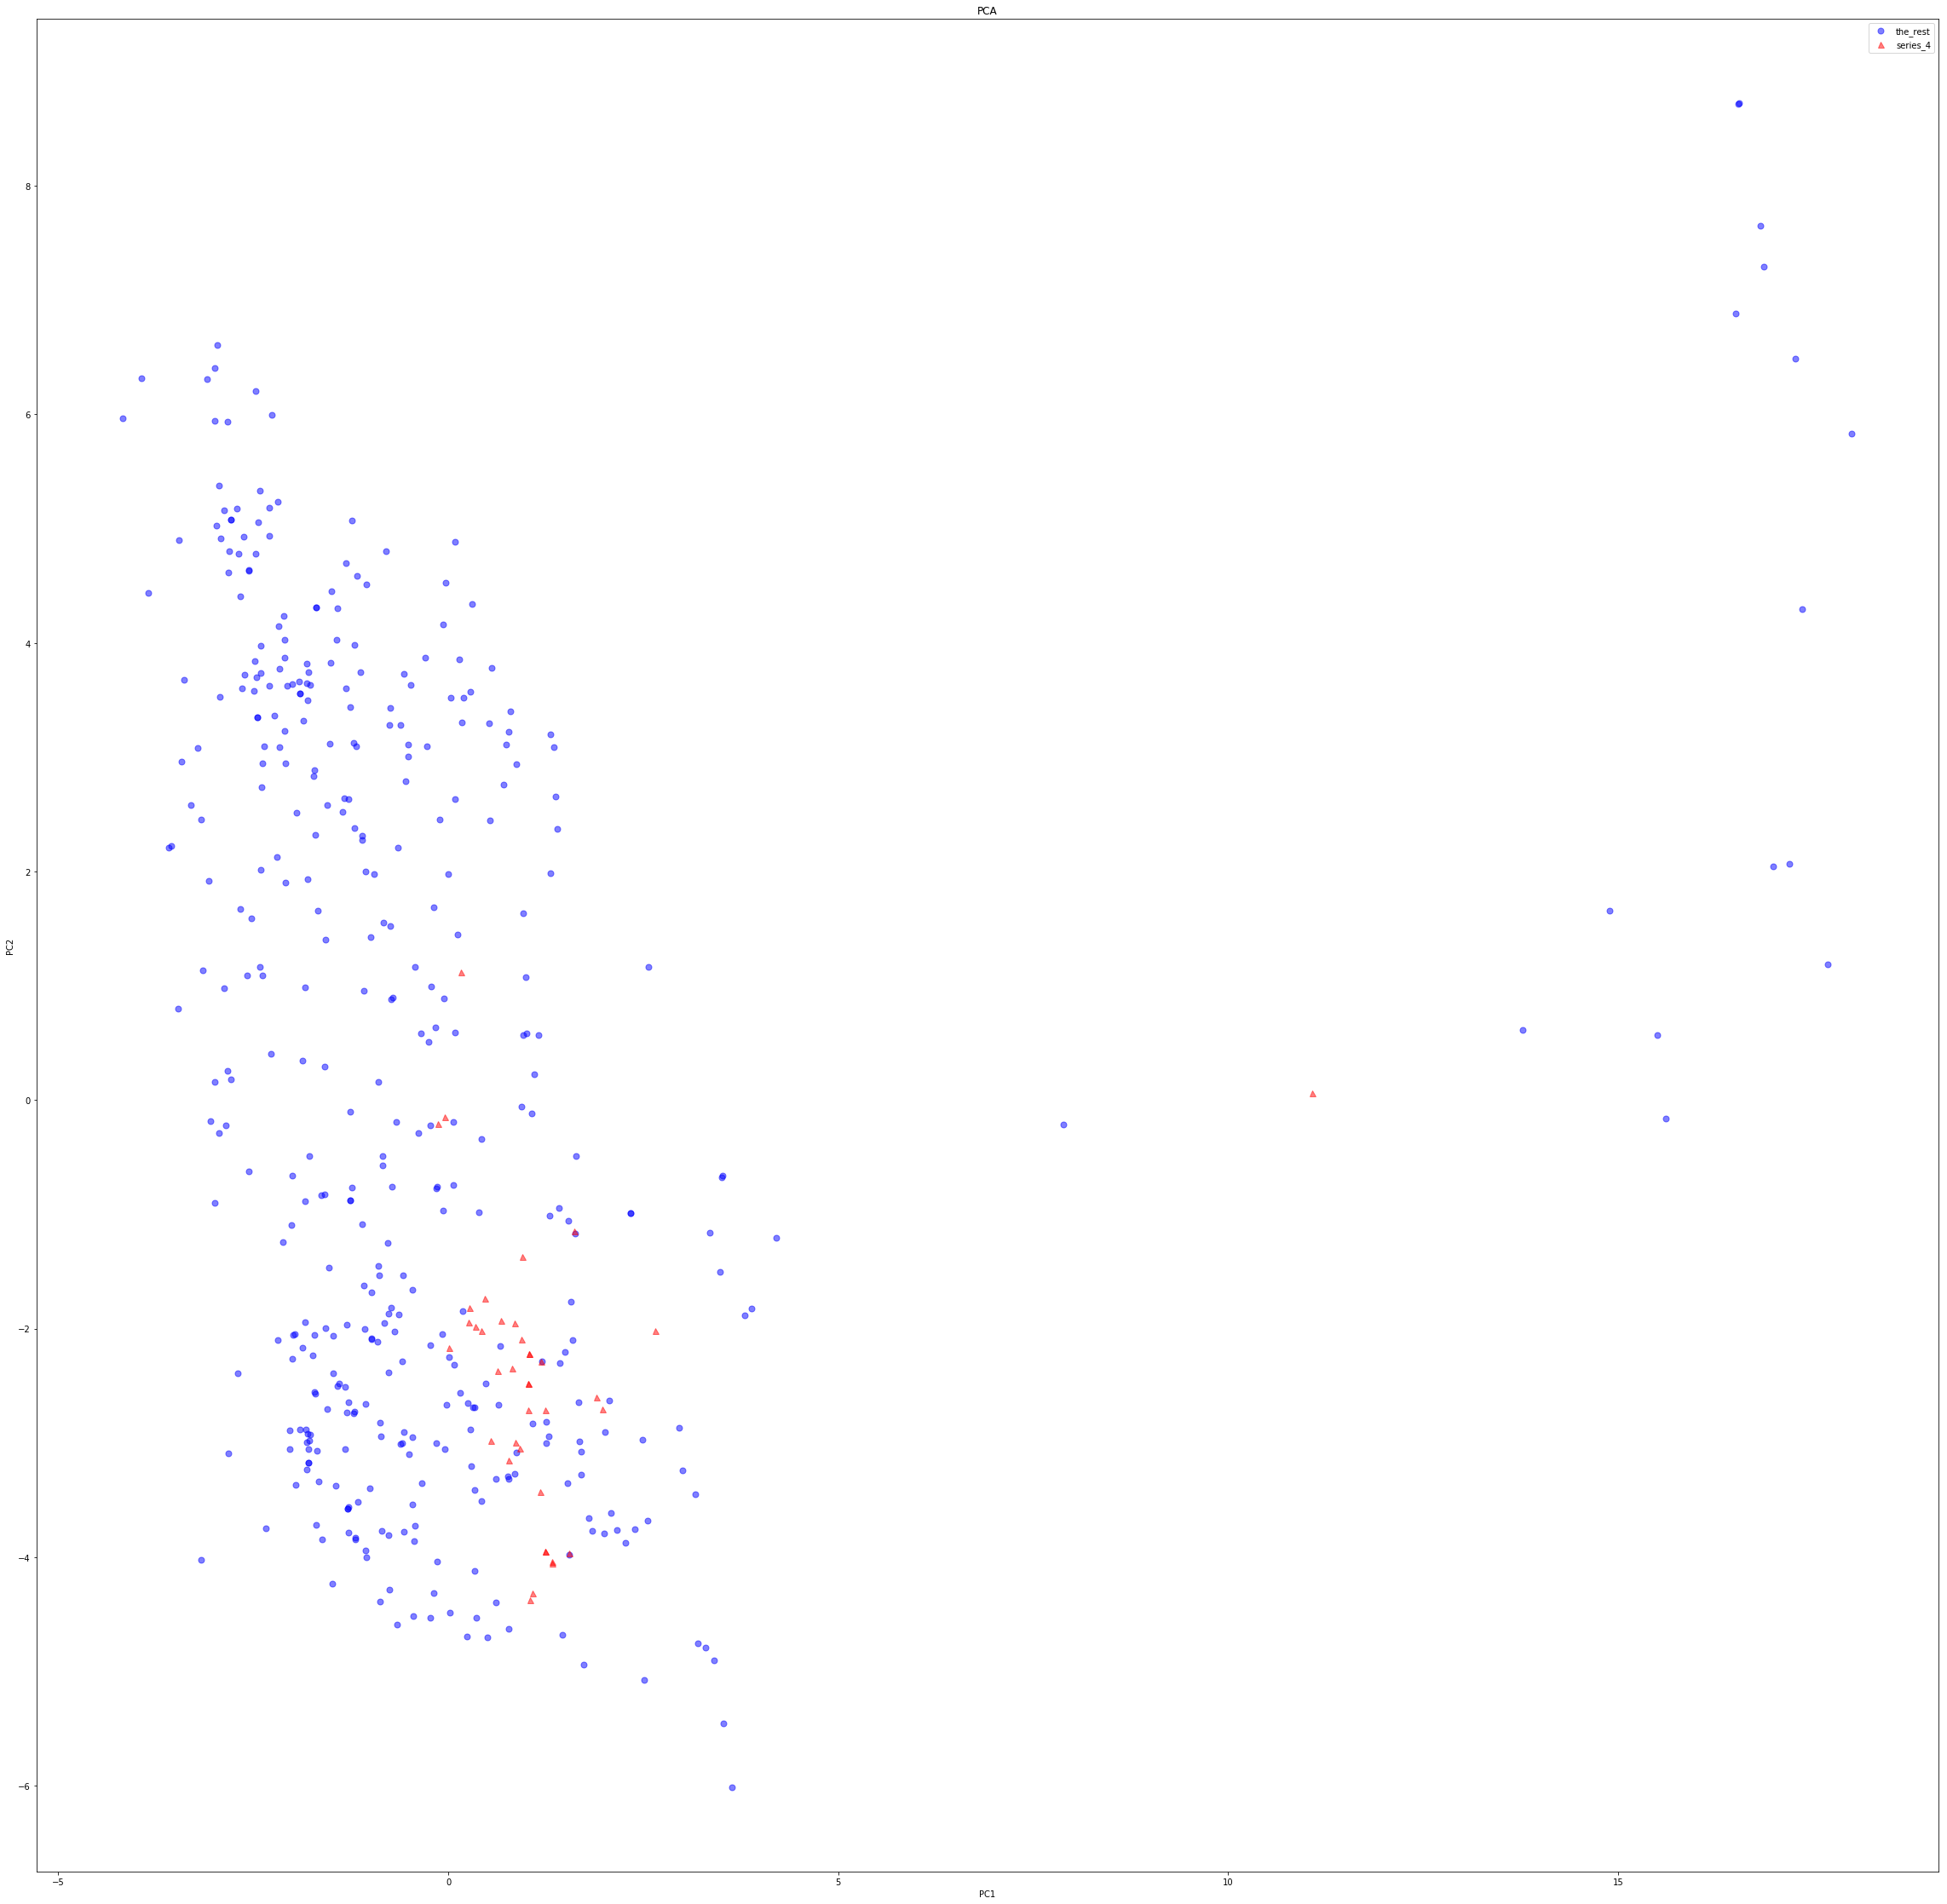

In [149]:
pca_tr_l = np.concatenate((pc_tr, typedesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='the_rest')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='series_4')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

In [150]:
fp = 'hashap'
df_new = osm_fp

#fp_individual adaptation

df_new = df_new.loc[:,('SMILES', 'MOLECULES', 'ION_ACTIVITY', 'TYPE', fp)]
for index, row in df_new.iterrows():
    name_fp = [j+"_"+str(i) for i, j in zip(range(1,nbits+1), [fp]*(nbits+1))]
    hey = df_new.loc[index, fp]
    fps = {n: d for n, d in zip(name_fp, hey)}
    for key in fps.keys():
        df_new.loc[index, key] = fps[key]
        

dfi_new = df_new.drop(df_new[df_new.ION_ACTIVITY == 0.5].index)
dfi_new = dfi_new.drop(['SMILES', 'MOLECULES', fp], axis=1)
# Removing non-numeric variables
npdesc = dfi_new.drop(['ION_ACTIVITY', 'TYPE'], axis=1).values
labdesc = dfi_new.ix[:, "ION_ACTIVITY"].values
typedesc = dfi_new.ix[:,"TYPE"].values    

npdesc = preprocessing.scale(npdesc)

Explained variance by principal components are [ 0.0647841   0.05268361]


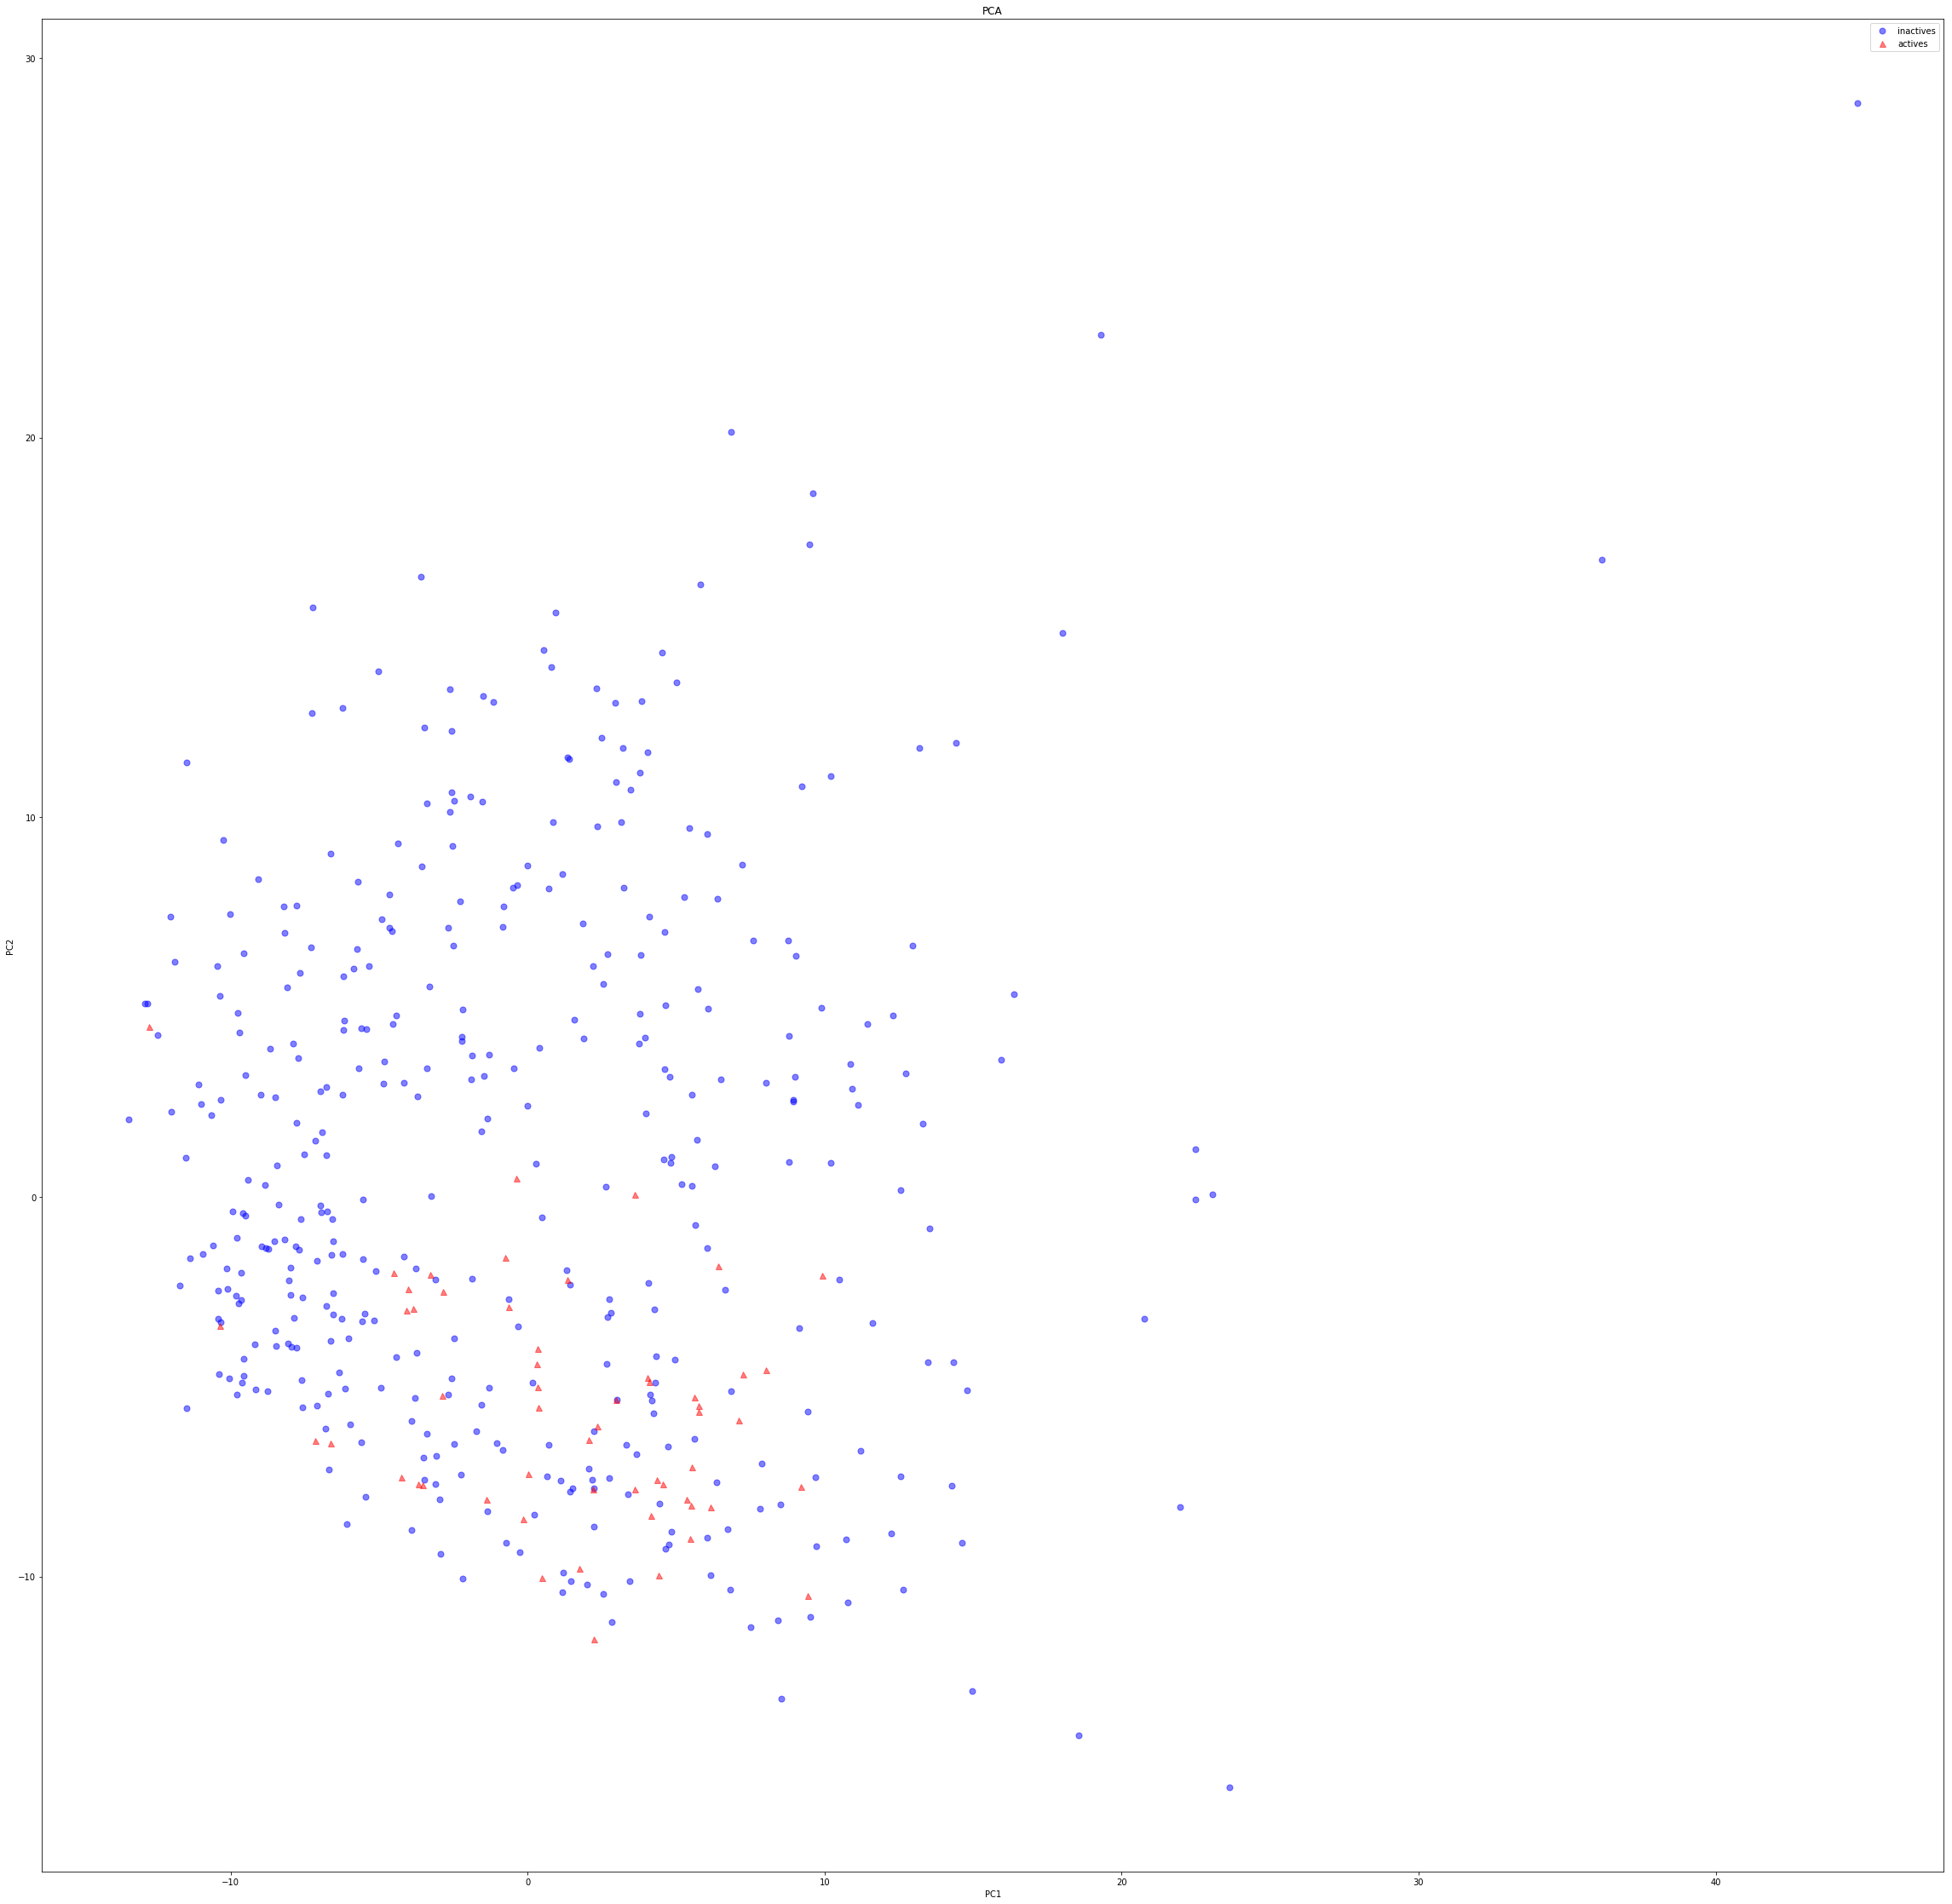

In [151]:
pca = PCA(n_components=2)
    
pc_tr = pca.fit_transform(npdesc)
    
print("Explained variance by principal components are %s" % pca.explained_variance_ratio_)
pca_tr_l = np.concatenate((pc_tr, labdesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='inactives')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='actives')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

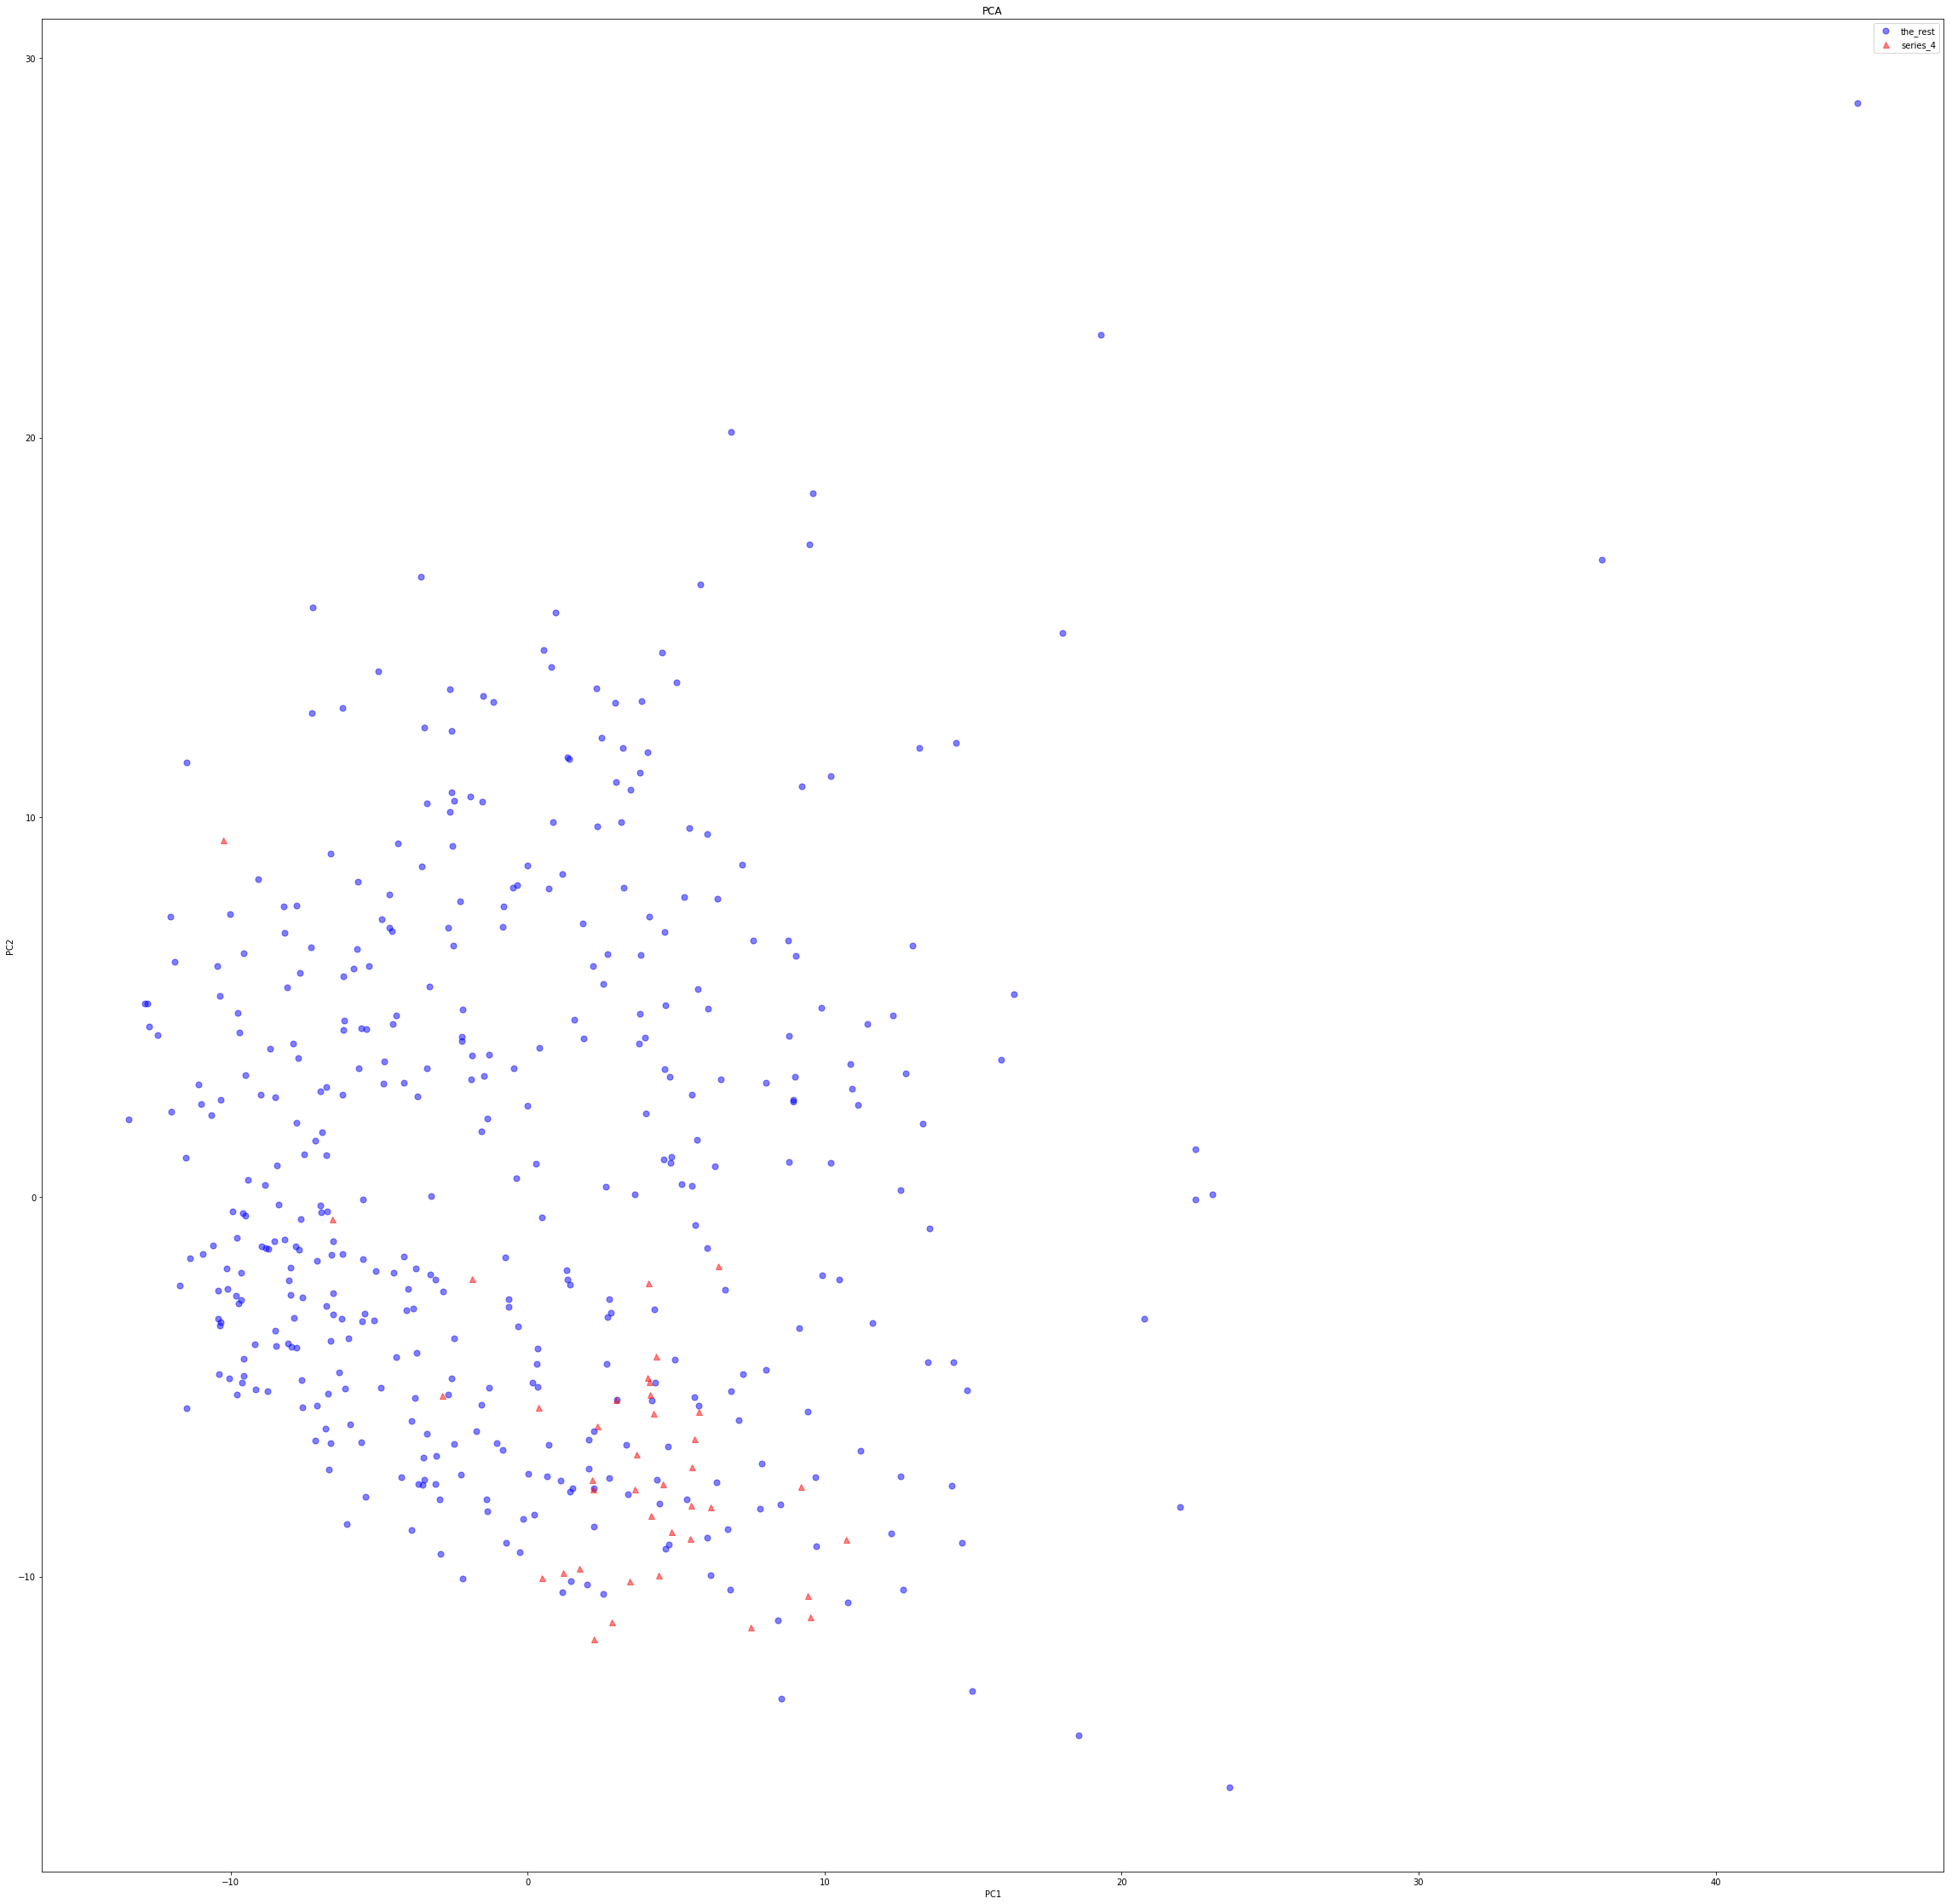

In [152]:
pca_tr_l = np.concatenate((pc_tr, typedesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='the_rest')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='series_4')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

In [153]:
fp = 'hashtt'
df_new = osm_fp

#fp_individual adaptation

df_new = df_new.loc[:,('SMILES', 'MOLECULES', 'ION_ACTIVITY', 'TYPE', fp)]
for index, row in df_new.iterrows():
    name_fp = [j+"_"+str(i) for i, j in zip(range(1,nbits+1), [fp]*(nbits+1))]
    hey = df_new.loc[index, fp]
    fps = {n: d for n, d in zip(name_fp, hey)}
    for key in fps.keys():
        df_new.loc[index, key] = fps[key]
        

dfi_new = df_new.drop(df_new[df_new.ION_ACTIVITY == 0.5].index)
dfi_new = dfi_new.drop(['SMILES', 'MOLECULES', fp], axis=1)
# Removing non-numeric variables
npdesc = dfi_new.drop(['ION_ACTIVITY', 'TYPE'], axis=1).values
labdesc = dfi_new.ix[:, "ION_ACTIVITY"].values
typedesc = dfi_new.ix[:,"TYPE"].values    

npdesc = preprocessing.scale(npdesc)

Explained variance by principal components are [ 0.04410797  0.03523792]


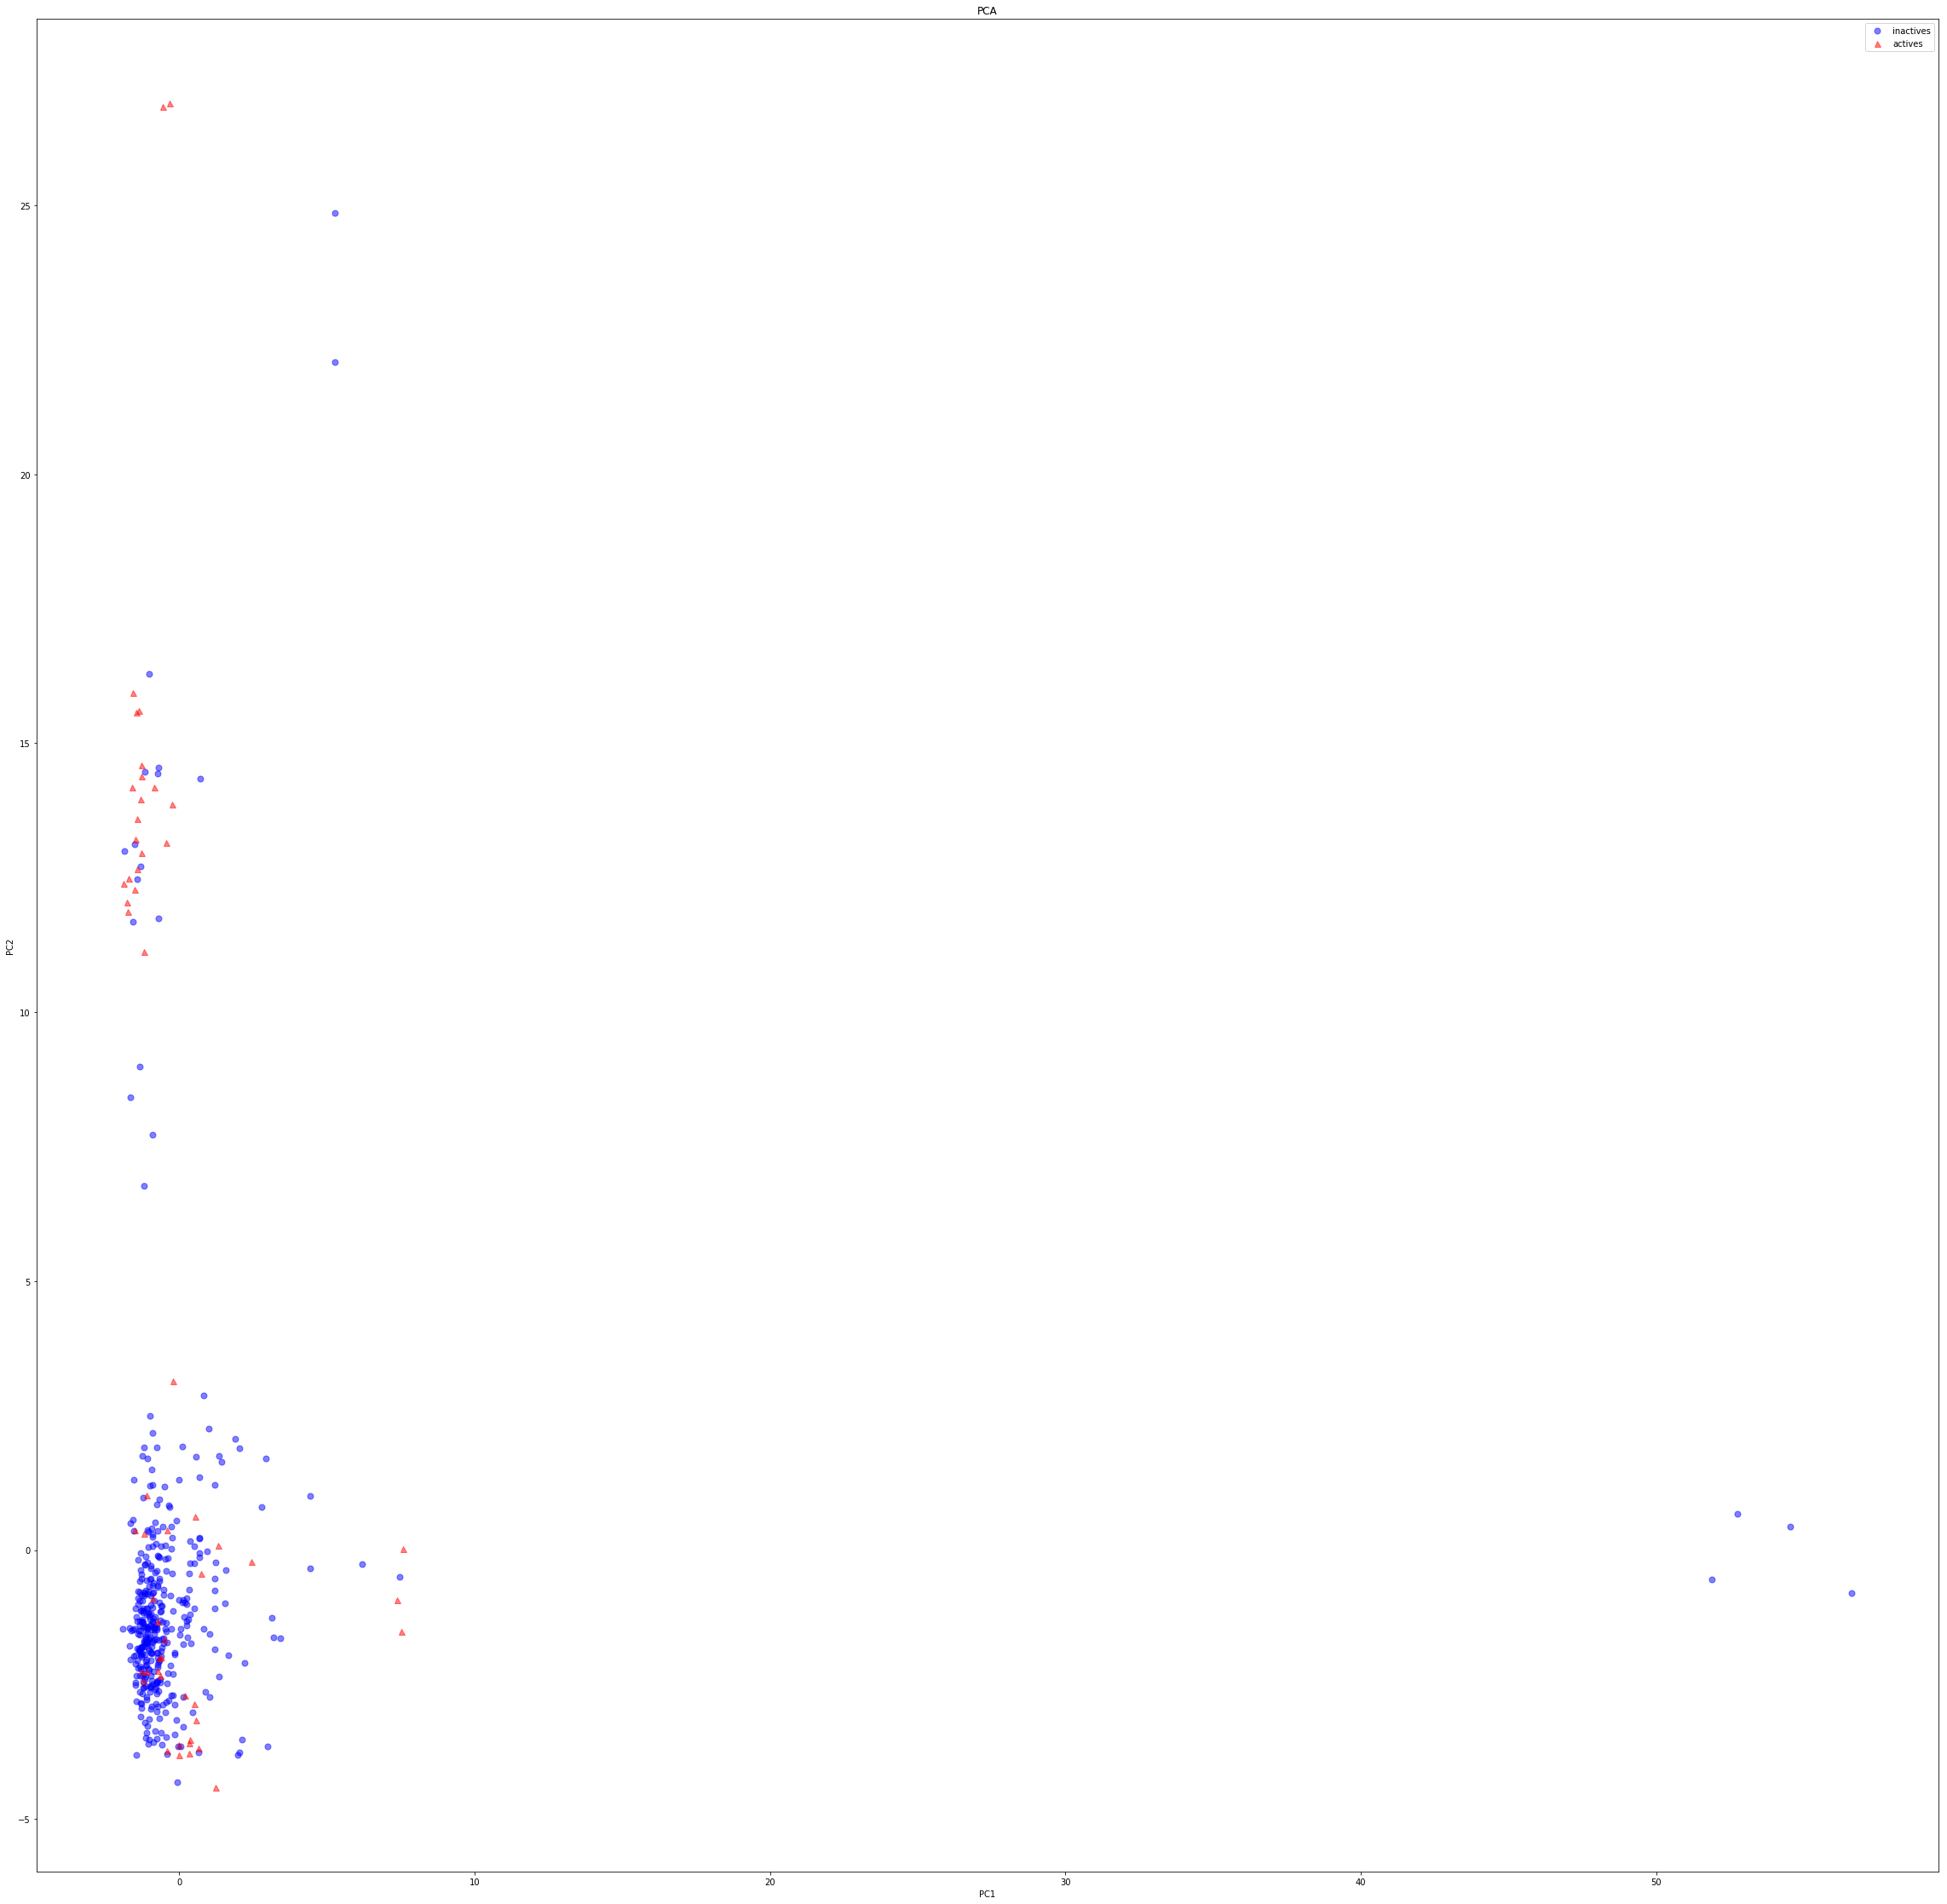

In [154]:
pca = PCA(n_components=2)
    
pc_tr = pca.fit_transform(npdesc)
    
print("Explained variance by principal components are %s" % pca.explained_variance_ratio_)
pca_tr_l = np.concatenate((pc_tr, labdesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='inactives')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='actives')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

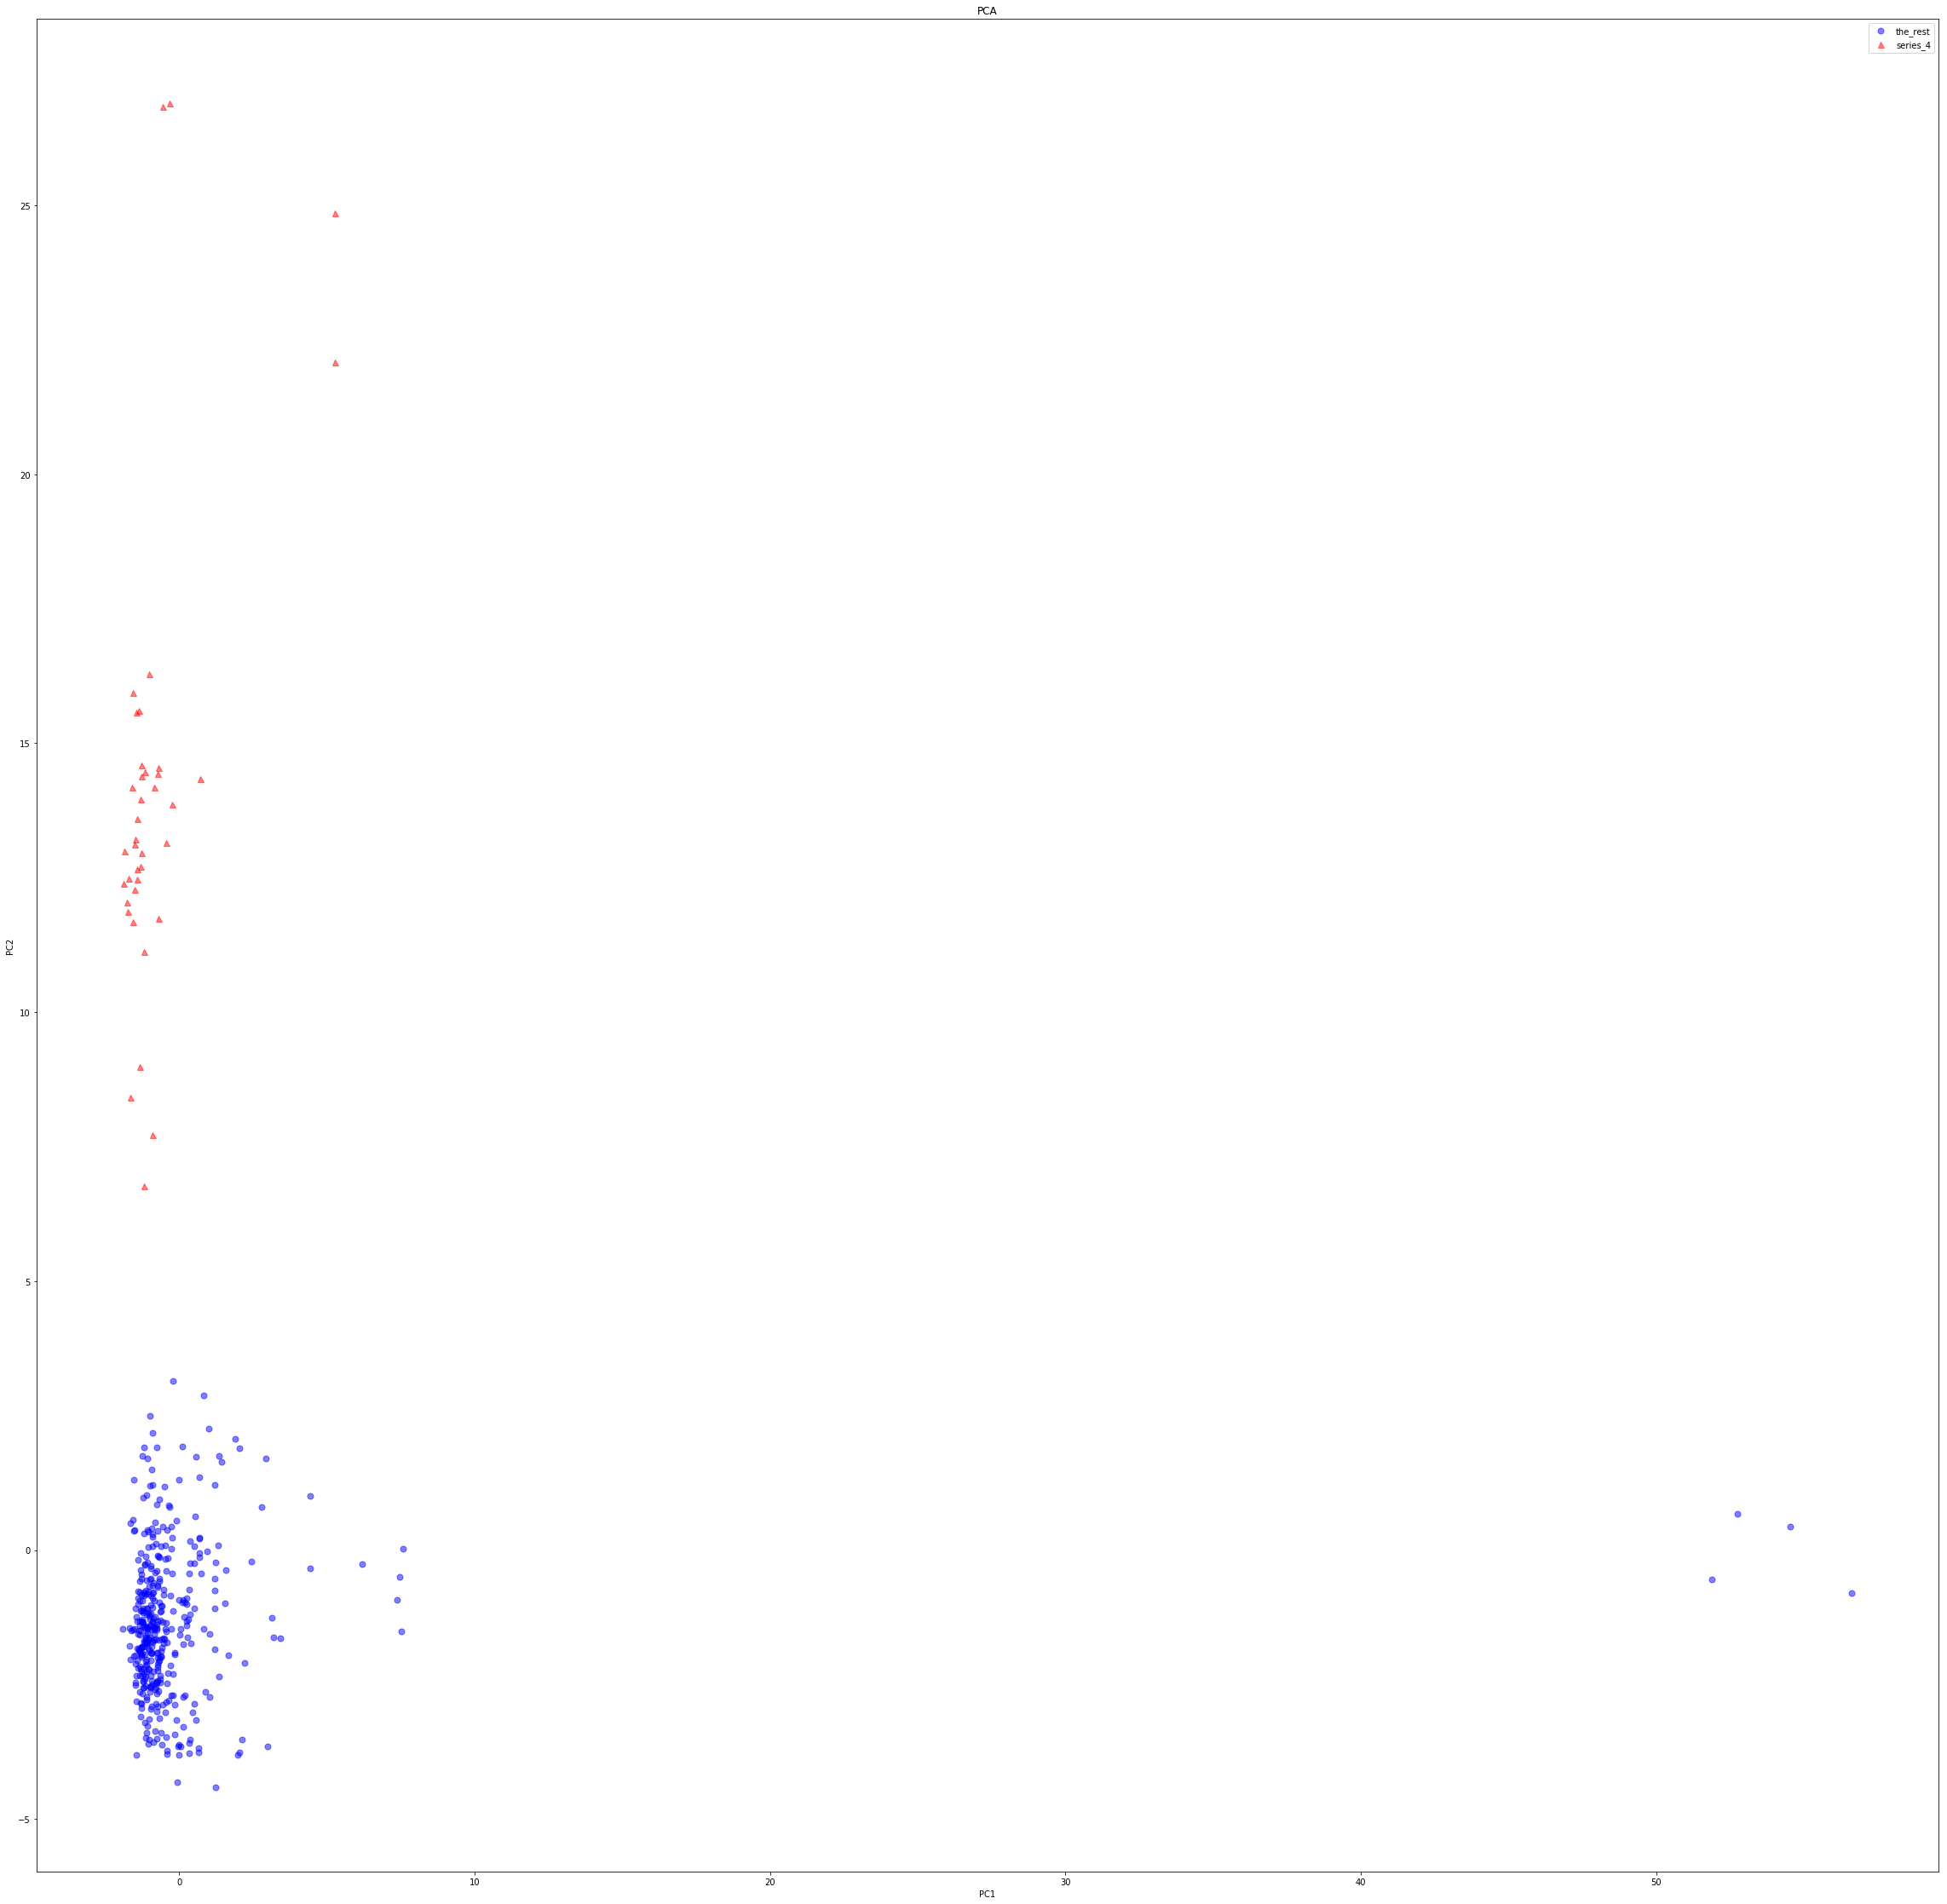

In [155]:
pca_tr_l = np.concatenate((pc_tr, typedesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='the_rest')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='series_4')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

In [156]:
fp = 'rdk7'
df_new = osm_fp

#fp_individual adaptation

df_new = df_new.loc[:,('SMILES', 'MOLECULES', 'ION_ACTIVITY', 'TYPE', fp)]
for index, row in df_new.iterrows():
    name_fp = [j+"_"+str(i) for i, j in zip(range(1,nbits+1), [fp]*(nbits+1))]
    hey = df_new.loc[index, fp]
    fps = {n: d for n, d in zip(name_fp, hey)}
    for key in fps.keys():
        df_new.loc[index, key] = fps[key]
        

dfi_new = df_new.drop(df_new[df_new.ION_ACTIVITY == 0.5].index)
dfi_new = dfi_new.drop(['SMILES', 'MOLECULES', fp], axis=1)
# Removing non-numeric variables
npdesc = dfi_new.drop(['ION_ACTIVITY', 'TYPE'], axis=1).values
labdesc = dfi_new.ix[:, "ION_ACTIVITY"].values
typedesc = dfi_new.ix[:,"TYPE"].values    

npdesc = preprocessing.scale(npdesc)

Explained variance by principal components are [ 0.14123073  0.04231893]


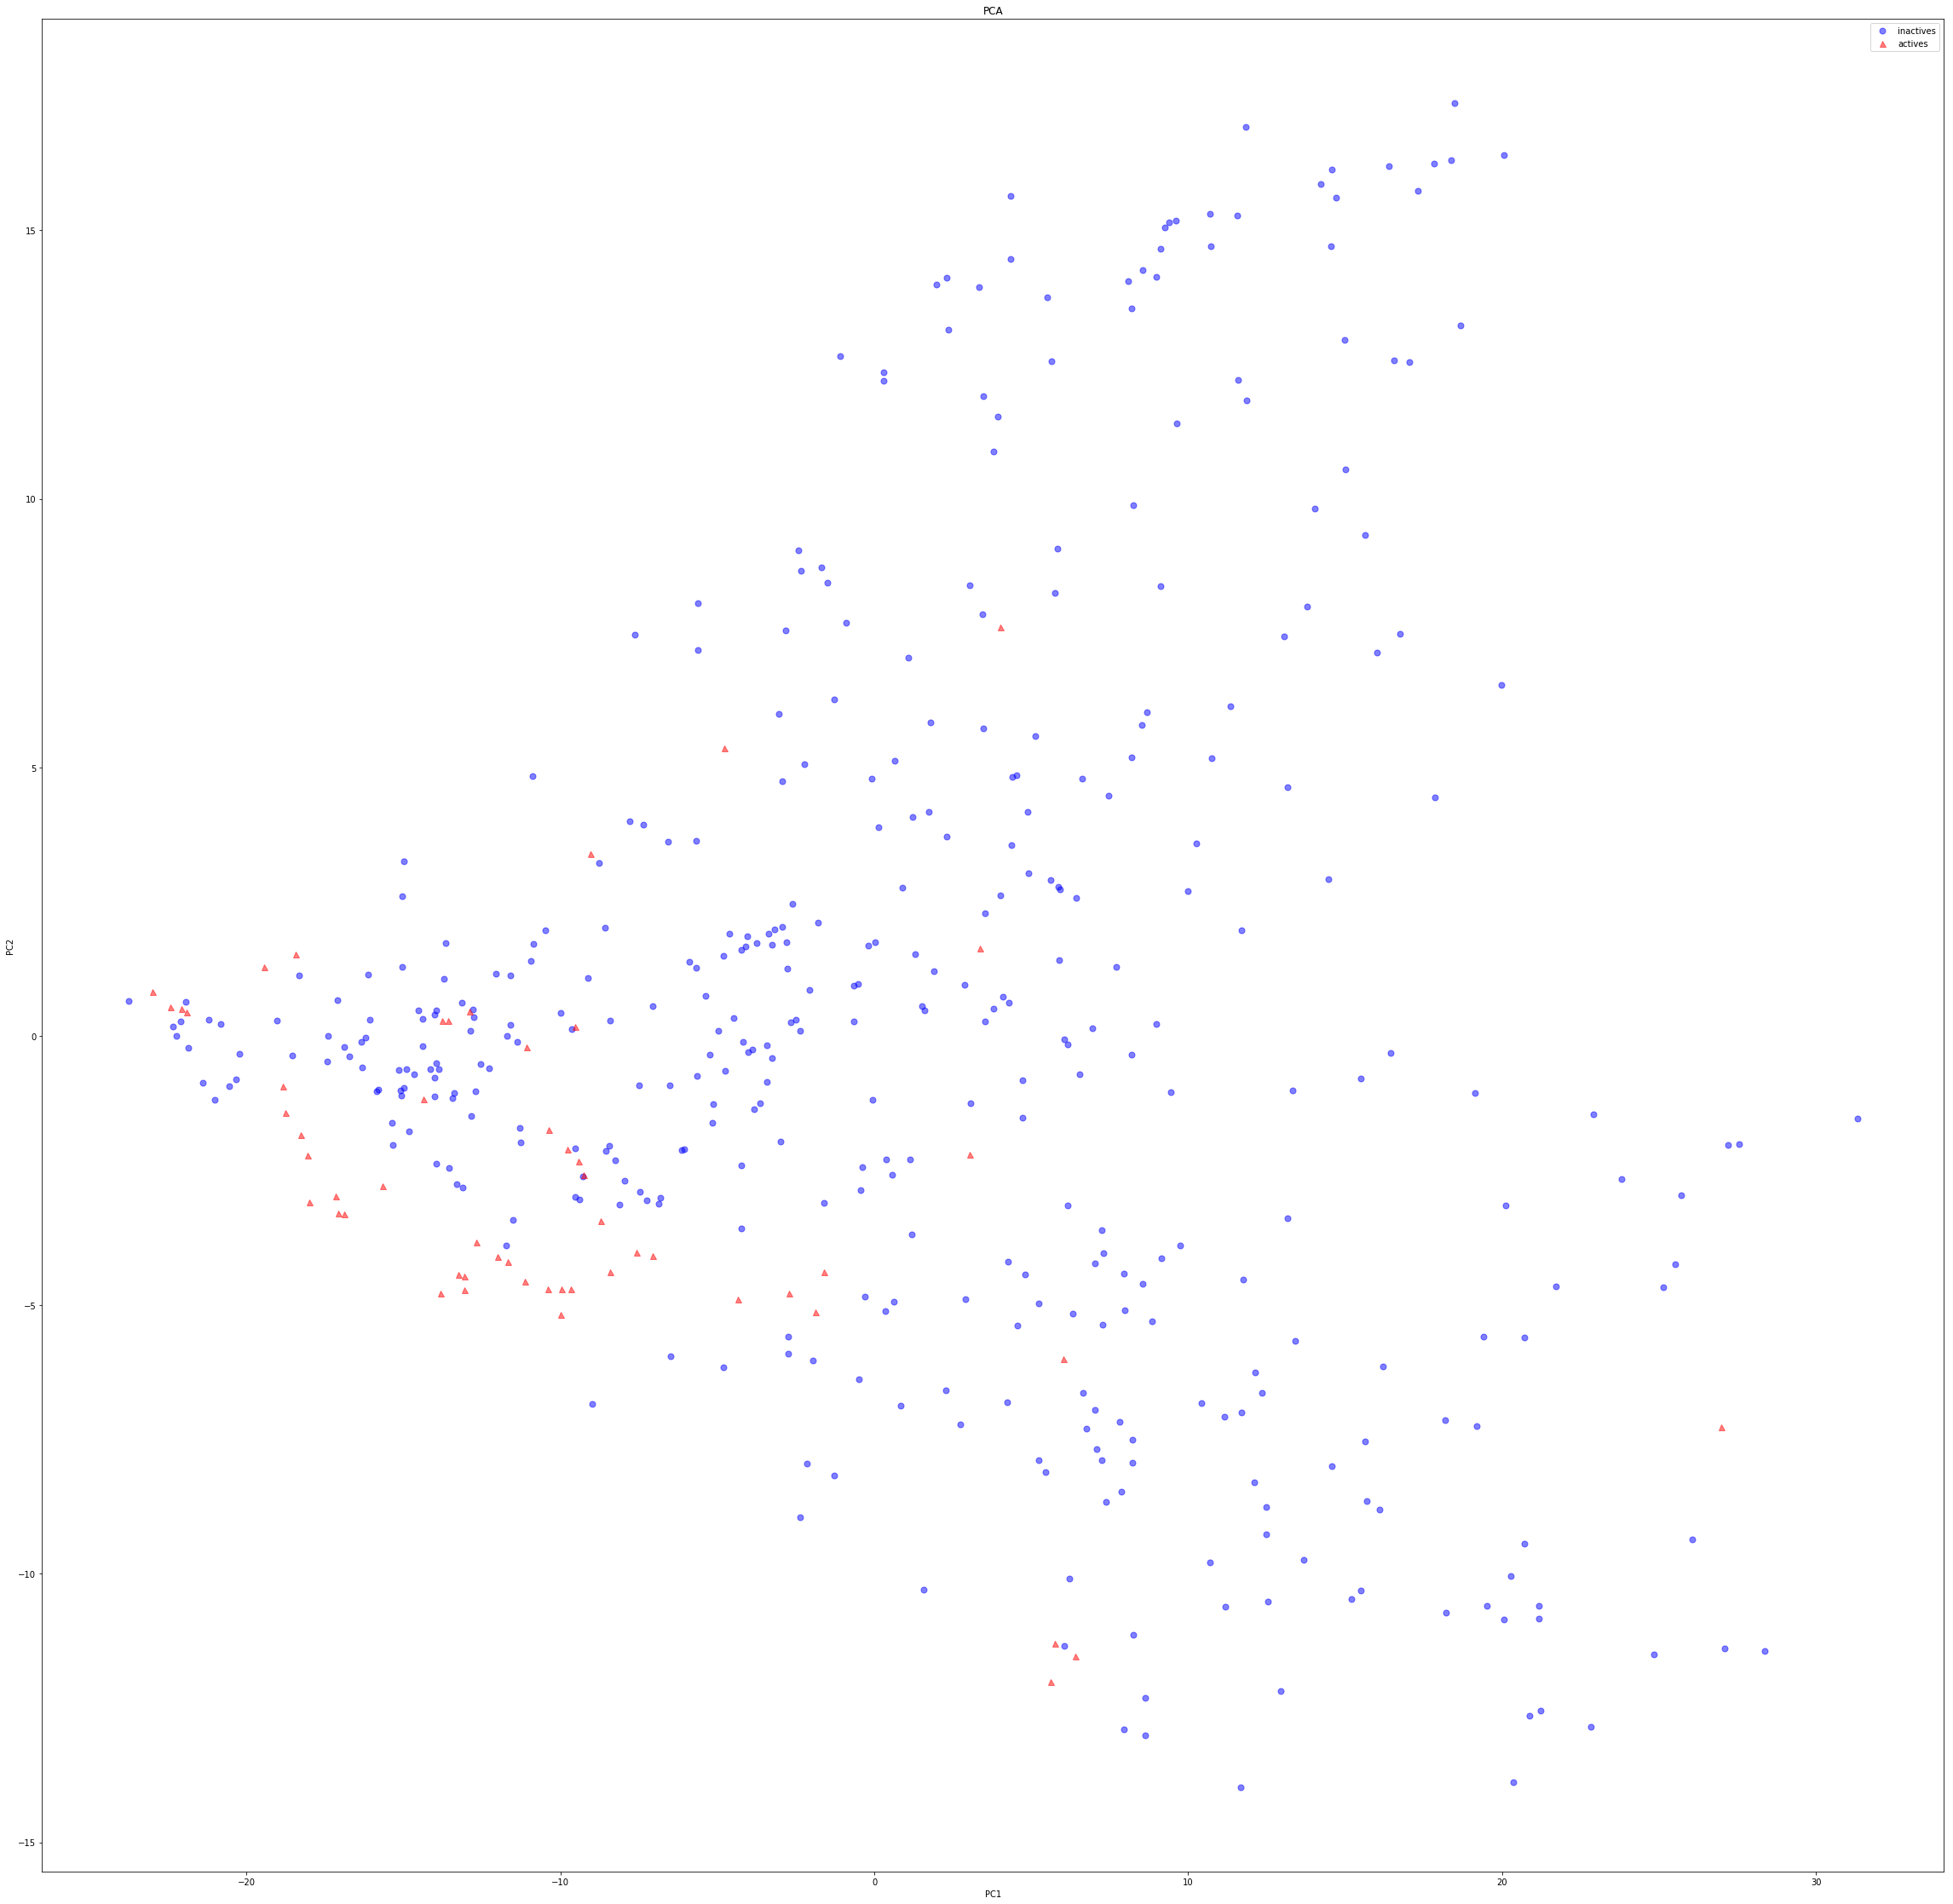

In [158]:
pca = PCA(n_components=2)
    
pc_tr = pca.fit_transform(npdesc)
    
print("Explained variance by principal components are %s" % pca.explained_variance_ratio_)
pca_tr_l = np.concatenate((pc_tr, labdesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='inactives')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='actives')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

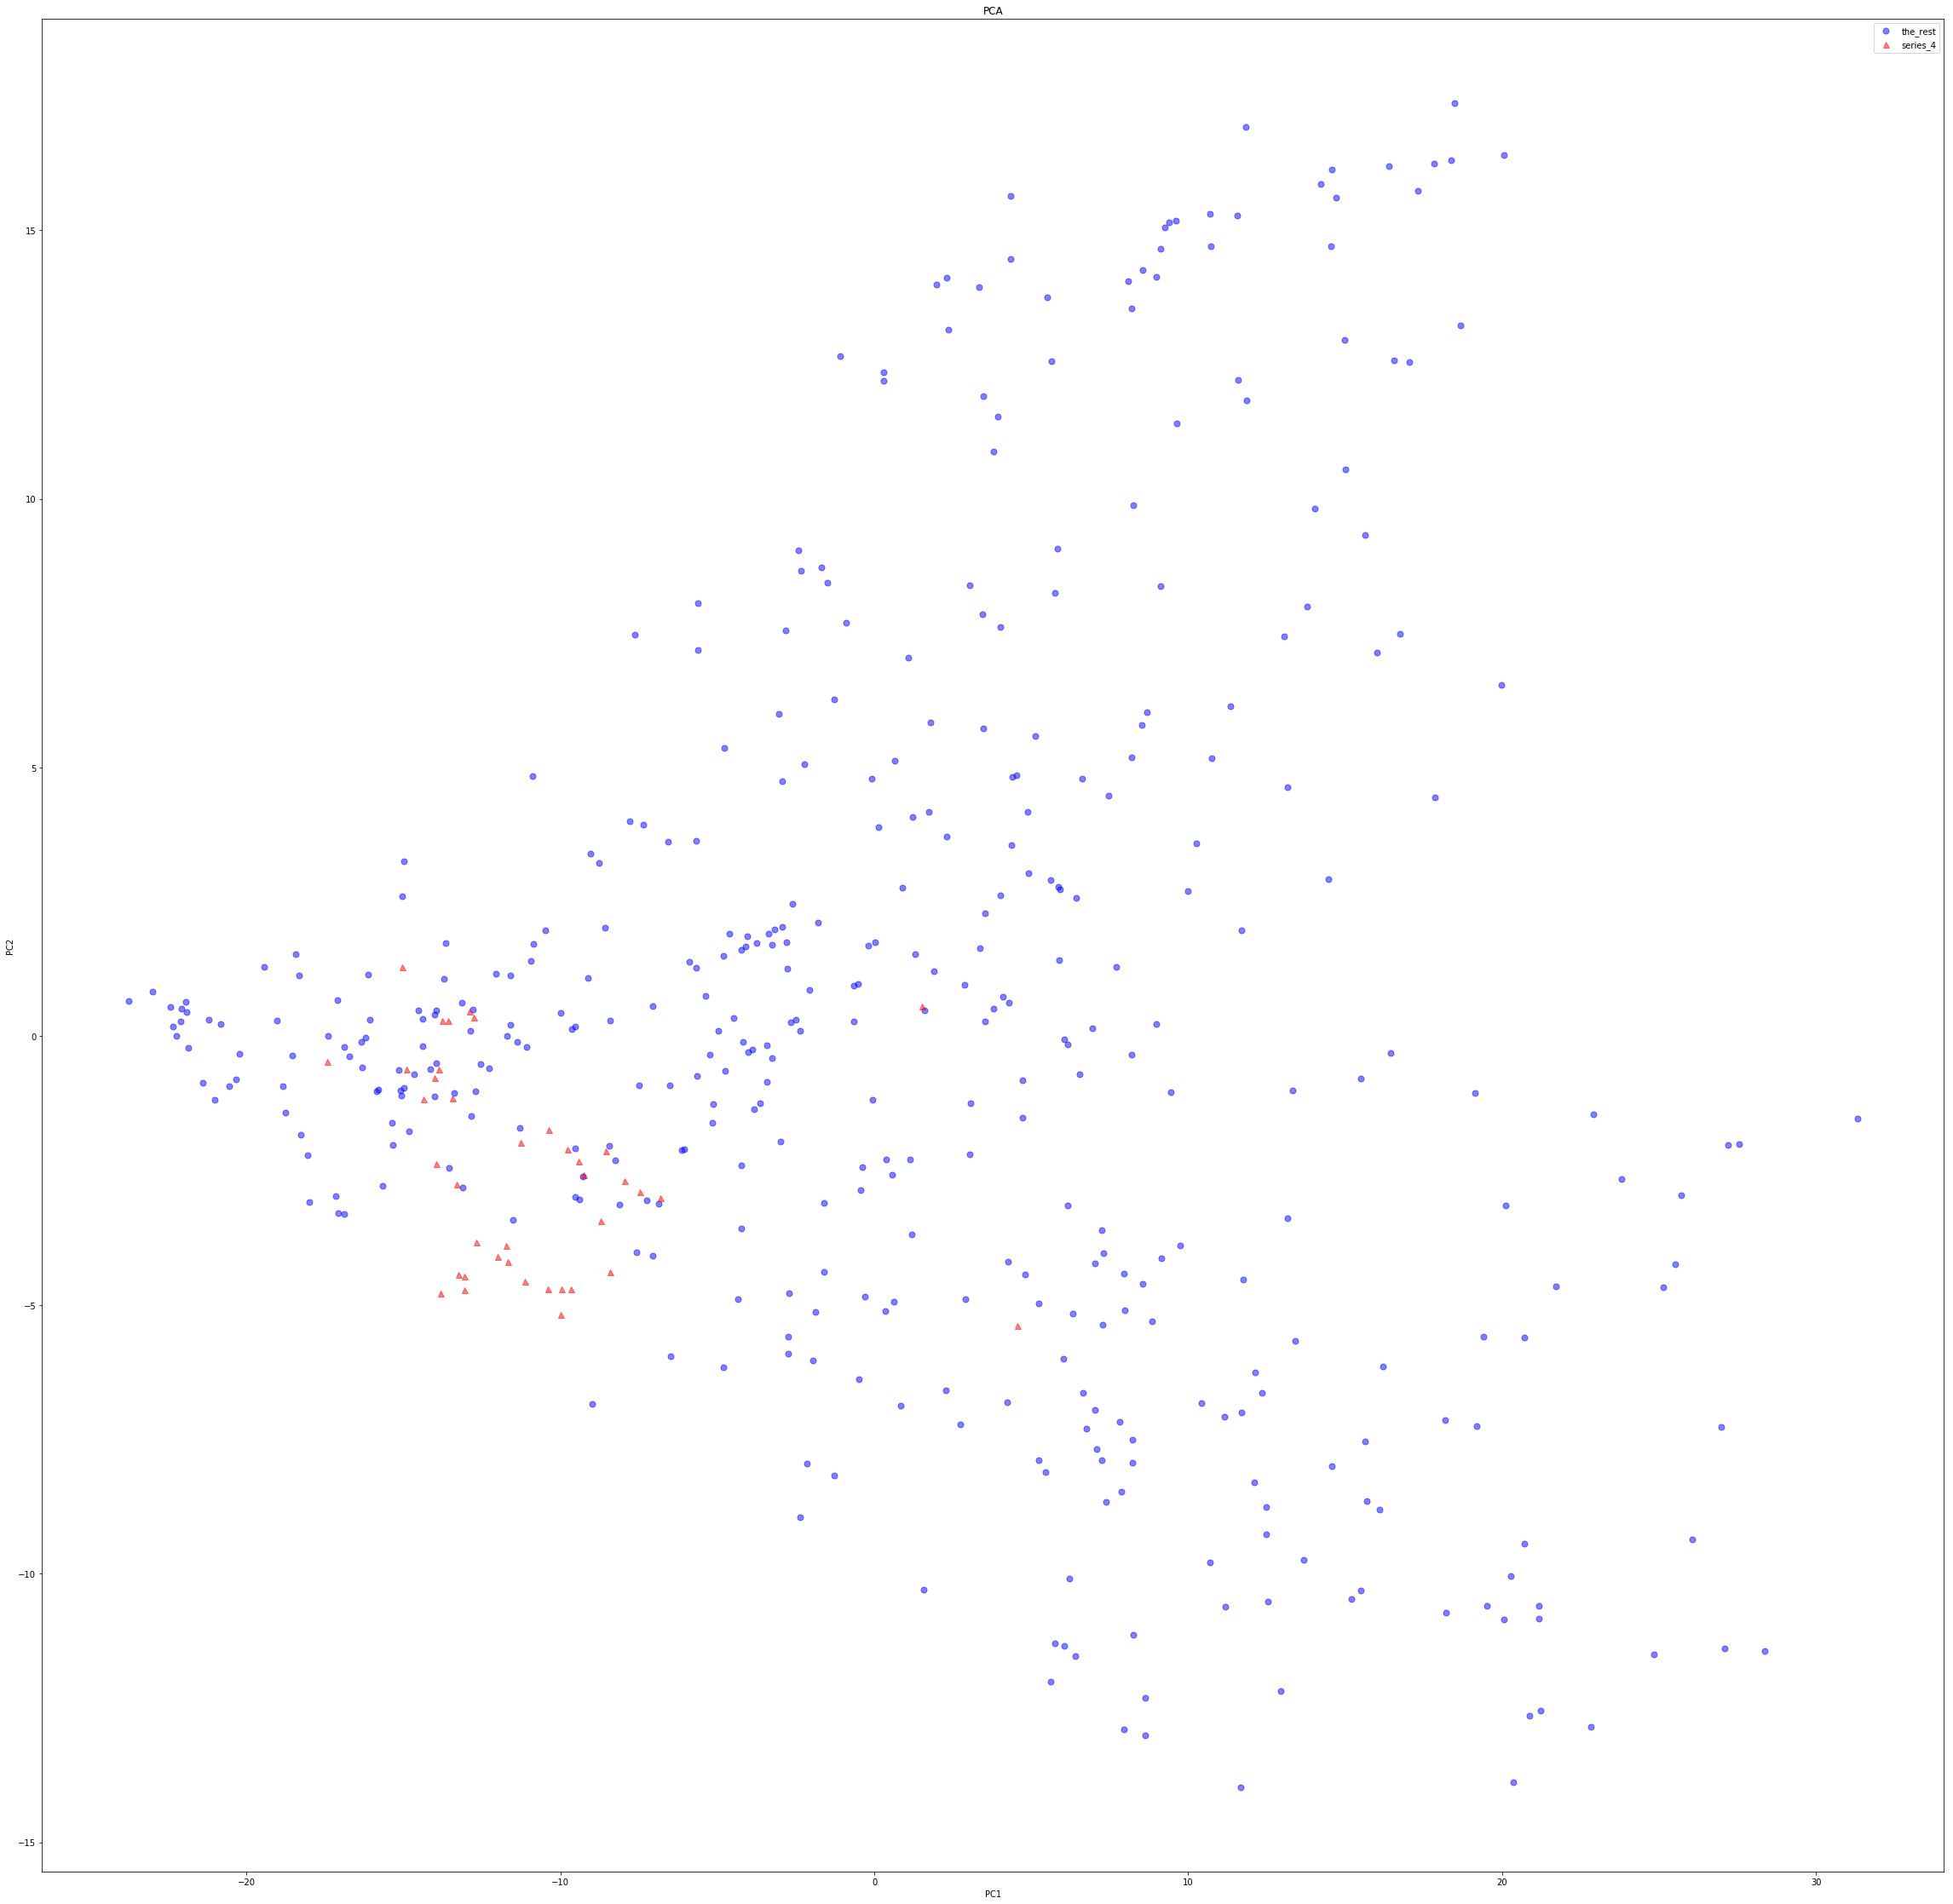

In [159]:
pca_tr_l = np.concatenate((pc_tr, typedesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='the_rest')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='series_4')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

In [188]:
#osm_sp

,SMILES,ION_ACTIVITY,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,...,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES,TYPE
0,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,0.0,-1.344684,-1.590917,-0.912275,-0.360957,0.660798,-0.296796,-0.585365,0.422541,...,-0.746215,-0.543645,-1.571117,1.245488,0.630471,0.090614,-0.247699,1.014066,NS(=O)(=O)c1cccc(c1)c1cc2ncnc(N)c2s1\t\n,0
1,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,0.0,-0.972756,-0.599229,-1.191730,-0.062539,-0.400282,1.034085,-0.274346,-1.470734,...,-0.190688,-0.461331,-1.399750,0.629246,0.877200,0.481078,0.569725,0.589520,O=C1/C(=C/c2c(C)n(c3ccc(OC)cc3)c(C)c2)/S/C(=N\...,0
2,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-0.882985,-1.716495,-1.209476,-0.173288,0.269660,0.715628,-0.448277,-0.529958,...,-0.607510,-0.636827,-1.634993,1.046786,0.674799,0.160305,-0.135462,1.164705,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1cc...,0
3,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,0.0,-1.133692,-1.744671,-1.028628,-0.722594,0.607502,0.868743,0.065441,-0.093313,...,-0.375085,-0.565645,-1.391250,1.597488,1.044611,-0.505079,-0.251909,0.639862,Cc1n(c2ccc(F)cc2)c(cc1C(=O)O)C\t\n,0
4,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,0.0,-0.962900,-1.479411,-1.327849,-0.285595,0.301038,0.793190,-0.434878,-0.580088,...,-0.565667,-0.664256,-1.650253,1.105108,0.698576,0.071976,-0.294305,1.081094,Fc1ccc(n2c(C)cc(C(=O)OCC(=O)N)c2C)cc1\t\n,0
5,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-1.338056,-1.934176,-1.015778,-0.182259,0.244859,1.075964,0.604126,1.045697,...,-0.505960,-0.146543,-1.583837,1.643038,0.655849,0.032191,0.208461,1.160337,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1nc...,0
6,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,0.0,-1.326454,-1.569075,-1.138815,-0.403756,0.726621,0.211642,-0.197000,0.045673,...,-0.047416,-0.913394,-1.581653,1.102452,0.954997,-0.532153,-0.950927,0.284621,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O\t\n,0
7,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,0.0,-0.877250,-1.298409,-1.297968,-0.424973,0.179257,0.799291,-0.068639,-0.688282,...,-0.526486,-0.279175,-1.593602,0.871159,0.664847,0.357254,0.453166,1.014470,CN(C)c1ccc(cc1)C(O)(c1ccc(cc1)N(C)C)c1ccc(cc1)...,0
8,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,0.0,-1.764267,-1.530600,-0.811042,0.003044,-0.388120,1.365805,0.203684,0.033225,...,-0.770497,-0.246050,-1.322011,1.826989,0.562704,-0.012351,0.059423,1.165754,c12cc(c3ccc(C)cc3)nn1ccnc2SCC(=O)Nc1c(Cl)ccc(C...,0
9,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,0.0,-1.650606,-1.014732,-1.077916,-0.003562,0.535364,1.145325,-0.207206,-0.650759,...,-0.528392,-0.263732,-1.436199,1.232277,0.229424,0.207890,0.087828,1.527760,CCOC(=O)C1=C(N=c2sc(=Cc3cc(C)n(c3C)c3ccc(F)cc3...,0


In [193]:
osm_sp = osm_sp.reset_index(drop=True)
#df_new = osm_sp

In [190]:
osm_sp['TYPE'] = mix['TYPE']

In [194]:
#osm_sp

,SMILES,ION_ACTIVITY,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,...,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES,TYPE
0,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,0.0,-1.344684,-1.590917,-0.912275,-0.360957,0.660798,-0.296796,-0.585365,0.422541,...,-0.746215,-0.543645,-1.571117,1.245488,0.630471,0.090614,-0.247699,1.014066,NS(=O)(=O)c1cccc(c1)c1cc2ncnc(N)c2s1\t\n,0
1,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,0.0,-0.972756,-0.599229,-1.191730,-0.062539,-0.400282,1.034085,-0.274346,-1.470734,...,-0.190688,-0.461331,-1.399750,0.629246,0.877200,0.481078,0.569725,0.589520,O=C1/C(=C/c2c(C)n(c3ccc(OC)cc3)c(C)c2)/S/C(=N\...,0
2,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-0.882985,-1.716495,-1.209476,-0.173288,0.269660,0.715628,-0.448277,-0.529958,...,-0.607510,-0.636827,-1.634993,1.046786,0.674799,0.160305,-0.135462,1.164705,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1cc...,0
3,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,0.0,-1.133692,-1.744671,-1.028628,-0.722594,0.607502,0.868743,0.065441,-0.093313,...,-0.375085,-0.565645,-1.391250,1.597488,1.044611,-0.505079,-0.251909,0.639862,Cc1n(c2ccc(F)cc2)c(cc1C(=O)O)C\t\n,0
4,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,0.0,-0.962900,-1.479411,-1.327849,-0.285595,0.301038,0.793190,-0.434878,-0.580088,...,-0.565667,-0.664256,-1.650253,1.105108,0.698576,0.071976,-0.294305,1.081094,Fc1ccc(n2c(C)cc(C(=O)OCC(=O)N)c2C)cc1\t\n,0
5,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-1.338056,-1.934176,-1.015778,-0.182259,0.244859,1.075964,0.604126,1.045697,...,-0.505960,-0.146543,-1.583837,1.643038,0.655849,0.032191,0.208461,1.160337,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1nc...,0
6,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,0.0,-1.326454,-1.569075,-1.138815,-0.403756,0.726621,0.211642,-0.197000,0.045673,...,-0.047416,-0.913394,-1.581653,1.102452,0.954997,-0.532153,-0.950927,0.284621,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O\t\n,0
7,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,0.0,-0.877250,-1.298409,-1.297968,-0.424973,0.179257,0.799291,-0.068639,-0.688282,...,-0.526486,-0.279175,-1.593602,0.871159,0.664847,0.357254,0.453166,1.014470,CN(C)c1ccc(cc1)C(O)(c1ccc(cc1)N(C)C)c1ccc(cc1)...,0
8,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,0.0,-1.764267,-1.530600,-0.811042,0.003044,-0.388120,1.365805,0.203684,0.033225,...,-0.770497,-0.246050,-1.322011,1.826989,0.562704,-0.012351,0.059423,1.165754,c12cc(c3ccc(C)cc3)nn1ccnc2SCC(=O)Nc1c(Cl)ccc(C...,0
9,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,0.0,-1.650606,-1.014732,-1.077916,-0.003562,0.535364,1.145325,-0.207206,-0.650759,...,-0.528392,-0.263732,-1.436199,1.232277,0.229424,0.207890,0.087828,1.527760,CCOC(=O)C1=C(N=c2sc(=Cc3cc(C)n(c3C)c3ccc(F)cc3...,0


In [195]:
#osm_sp['TYPE']=mix['TYPE']
pd.to_numeric(osm_sp['TYPE'])
#osm_sp

,SMILES,ION_ACTIVITY,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,...,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES,TYPE
0,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,0.0,-1.344684,-1.590917,-0.912275,-0.360957,0.660798,-0.296796,-0.585365,0.422541,...,-0.746215,-0.543645,-1.571117,1.245488,0.630471,0.090614,-0.247699,1.014066,NS(=O)(=O)c1cccc(c1)c1cc2ncnc(N)c2s1\t\n,0
1,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,0.0,-0.972756,-0.599229,-1.191730,-0.062539,-0.400282,1.034085,-0.274346,-1.470734,...,-0.190688,-0.461331,-1.399750,0.629246,0.877200,0.481078,0.569725,0.589520,O=C1/C(=C/c2c(C)n(c3ccc(OC)cc3)c(C)c2)/S/C(=N\...,0
2,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-0.882985,-1.716495,-1.209476,-0.173288,0.269660,0.715628,-0.448277,-0.529958,...,-0.607510,-0.636827,-1.634993,1.046786,0.674799,0.160305,-0.135462,1.164705,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1cc...,0
3,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,0.0,-1.133692,-1.744671,-1.028628,-0.722594,0.607502,0.868743,0.065441,-0.093313,...,-0.375085,-0.565645,-1.391250,1.597488,1.044611,-0.505079,-0.251909,0.639862,Cc1n(c2ccc(F)cc2)c(cc1C(=O)O)C\t\n,0
4,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,0.0,-0.962900,-1.479411,-1.327849,-0.285595,0.301038,0.793190,-0.434878,-0.580088,...,-0.565667,-0.664256,-1.650253,1.105108,0.698576,0.071976,-0.294305,1.081094,Fc1ccc(n2c(C)cc(C(=O)OCC(=O)N)c2C)cc1\t\n,0
5,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-1.338056,-1.934176,-1.015778,-0.182259,0.244859,1.075964,0.604126,1.045697,...,-0.505960,-0.146543,-1.583837,1.643038,0.655849,0.032191,0.208461,1.160337,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1nc...,0
6,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,0.0,-1.326454,-1.569075,-1.138815,-0.403756,0.726621,0.211642,-0.197000,0.045673,...,-0.047416,-0.913394,-1.581653,1.102452,0.954997,-0.532153,-0.950927,0.284621,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O\t\n,0
7,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,0.0,-0.877250,-1.298409,-1.297968,-0.424973,0.179257,0.799291,-0.068639,-0.688282,...,-0.526486,-0.279175,-1.593602,0.871159,0.664847,0.357254,0.453166,1.014470,CN(C)c1ccc(cc1)C(O)(c1ccc(cc1)N(C)C)c1ccc(cc1)...,0
8,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,0.0,-1.764267,-1.530600,-0.811042,0.003044,-0.388120,1.365805,0.203684,0.033225,...,-0.770497,-0.246050,-1.322011,1.826989,0.562704,-0.012351,0.059423,1.165754,c12cc(c3ccc(C)cc3)nn1ccnc2SCC(=O)Nc1c(Cl)ccc(C...,0
9,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,0.0,-1.650606,-1.014732,-1.077916,-0.003562,0.535364,1.145325,-0.207206,-0.650759,...,-0.528392,-0.263732,-1.436199,1.232277,0.229424,0.207890,0.087828,1.527760,CCOC(=O)C1=C(N=c2sc(=Cc3cc(C)n(c3C)c3ccc(F)cc3...,0


In [196]:
df_new=osm_sp
dfi_new = df_new
#dfi_new

,SMILES,ION_ACTIVITY,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,...,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES,TYPE
0,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,0.0,-1.344684,-1.590917,-0.912275,-0.360957,0.660798,-0.296796,-0.585365,0.422541,...,-0.746215,-0.543645,-1.571117,1.245488,0.630471,0.090614,-0.247699,1.014066,NS(=O)(=O)c1cccc(c1)c1cc2ncnc(N)c2s1\t\n,0
1,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,0.0,-0.972756,-0.599229,-1.191730,-0.062539,-0.400282,1.034085,-0.274346,-1.470734,...,-0.190688,-0.461331,-1.399750,0.629246,0.877200,0.481078,0.569725,0.589520,O=C1/C(=C/c2c(C)n(c3ccc(OC)cc3)c(C)c2)/S/C(=N\...,0
2,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-0.882985,-1.716495,-1.209476,-0.173288,0.269660,0.715628,-0.448277,-0.529958,...,-0.607510,-0.636827,-1.634993,1.046786,0.674799,0.160305,-0.135462,1.164705,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1cc...,0
3,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,0.0,-1.133692,-1.744671,-1.028628,-0.722594,0.607502,0.868743,0.065441,-0.093313,...,-0.375085,-0.565645,-1.391250,1.597488,1.044611,-0.505079,-0.251909,0.639862,Cc1n(c2ccc(F)cc2)c(cc1C(=O)O)C\t\n,0
4,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,0.0,-0.962900,-1.479411,-1.327849,-0.285595,0.301038,0.793190,-0.434878,-0.580088,...,-0.565667,-0.664256,-1.650253,1.105108,0.698576,0.071976,-0.294305,1.081094,Fc1ccc(n2c(C)cc(C(=O)OCC(=O)N)c2C)cc1\t\n,0
5,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-1.338056,-1.934176,-1.015778,-0.182259,0.244859,1.075964,0.604126,1.045697,...,-0.505960,-0.146543,-1.583837,1.643038,0.655849,0.032191,0.208461,1.160337,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1nc...,0
6,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,0.0,-1.326454,-1.569075,-1.138815,-0.403756,0.726621,0.211642,-0.197000,0.045673,...,-0.047416,-0.913394,-1.581653,1.102452,0.954997,-0.532153,-0.950927,0.284621,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O\t\n,0
7,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,0.0,-0.877250,-1.298409,-1.297968,-0.424973,0.179257,0.799291,-0.068639,-0.688282,...,-0.526486,-0.279175,-1.593602,0.871159,0.664847,0.357254,0.453166,1.014470,CN(C)c1ccc(cc1)C(O)(c1ccc(cc1)N(C)C)c1ccc(cc1)...,0
8,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,0.0,-1.764267,-1.530600,-0.811042,0.003044,-0.388120,1.365805,0.203684,0.033225,...,-0.770497,-0.246050,-1.322011,1.826989,0.562704,-0.012351,0.059423,1.165754,c12cc(c3ccc(C)cc3)nn1ccnc2SCC(=O)Nc1c(Cl)ccc(C...,0
9,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,0.0,-1.650606,-1.014732,-1.077916,-0.003562,0.535364,1.145325,-0.207206,-0.650759,...,-0.528392,-0.263732,-1.436199,1.232277,0.229424,0.207890,0.087828,1.527760,CCOC(=O)C1=C(N=c2sc(=Cc3cc(C)n(c3C)c3ccc(F)cc3...,0


In [197]:
dfi_new = df_new.drop(df_new[df_new.ION_ACTIVITY == 0.5].index)
dfi_new = dfi_new.drop(['SMILES', 'MOLECULES'], axis=1)
# Removing non-numeric variables
npdesc = dfi_new.drop(['ION_ACTIVITY', 'TYPE'], axis=1).values
labdesc = dfi_new.ix[:, "ION_ACTIVITY"].values
typedesc = dfi_new.ix[:,"TYPE"].values    

npdesc = preprocessing.scale(npdesc)

Explained variance by principal components are [ 0.26351151  0.10117373]


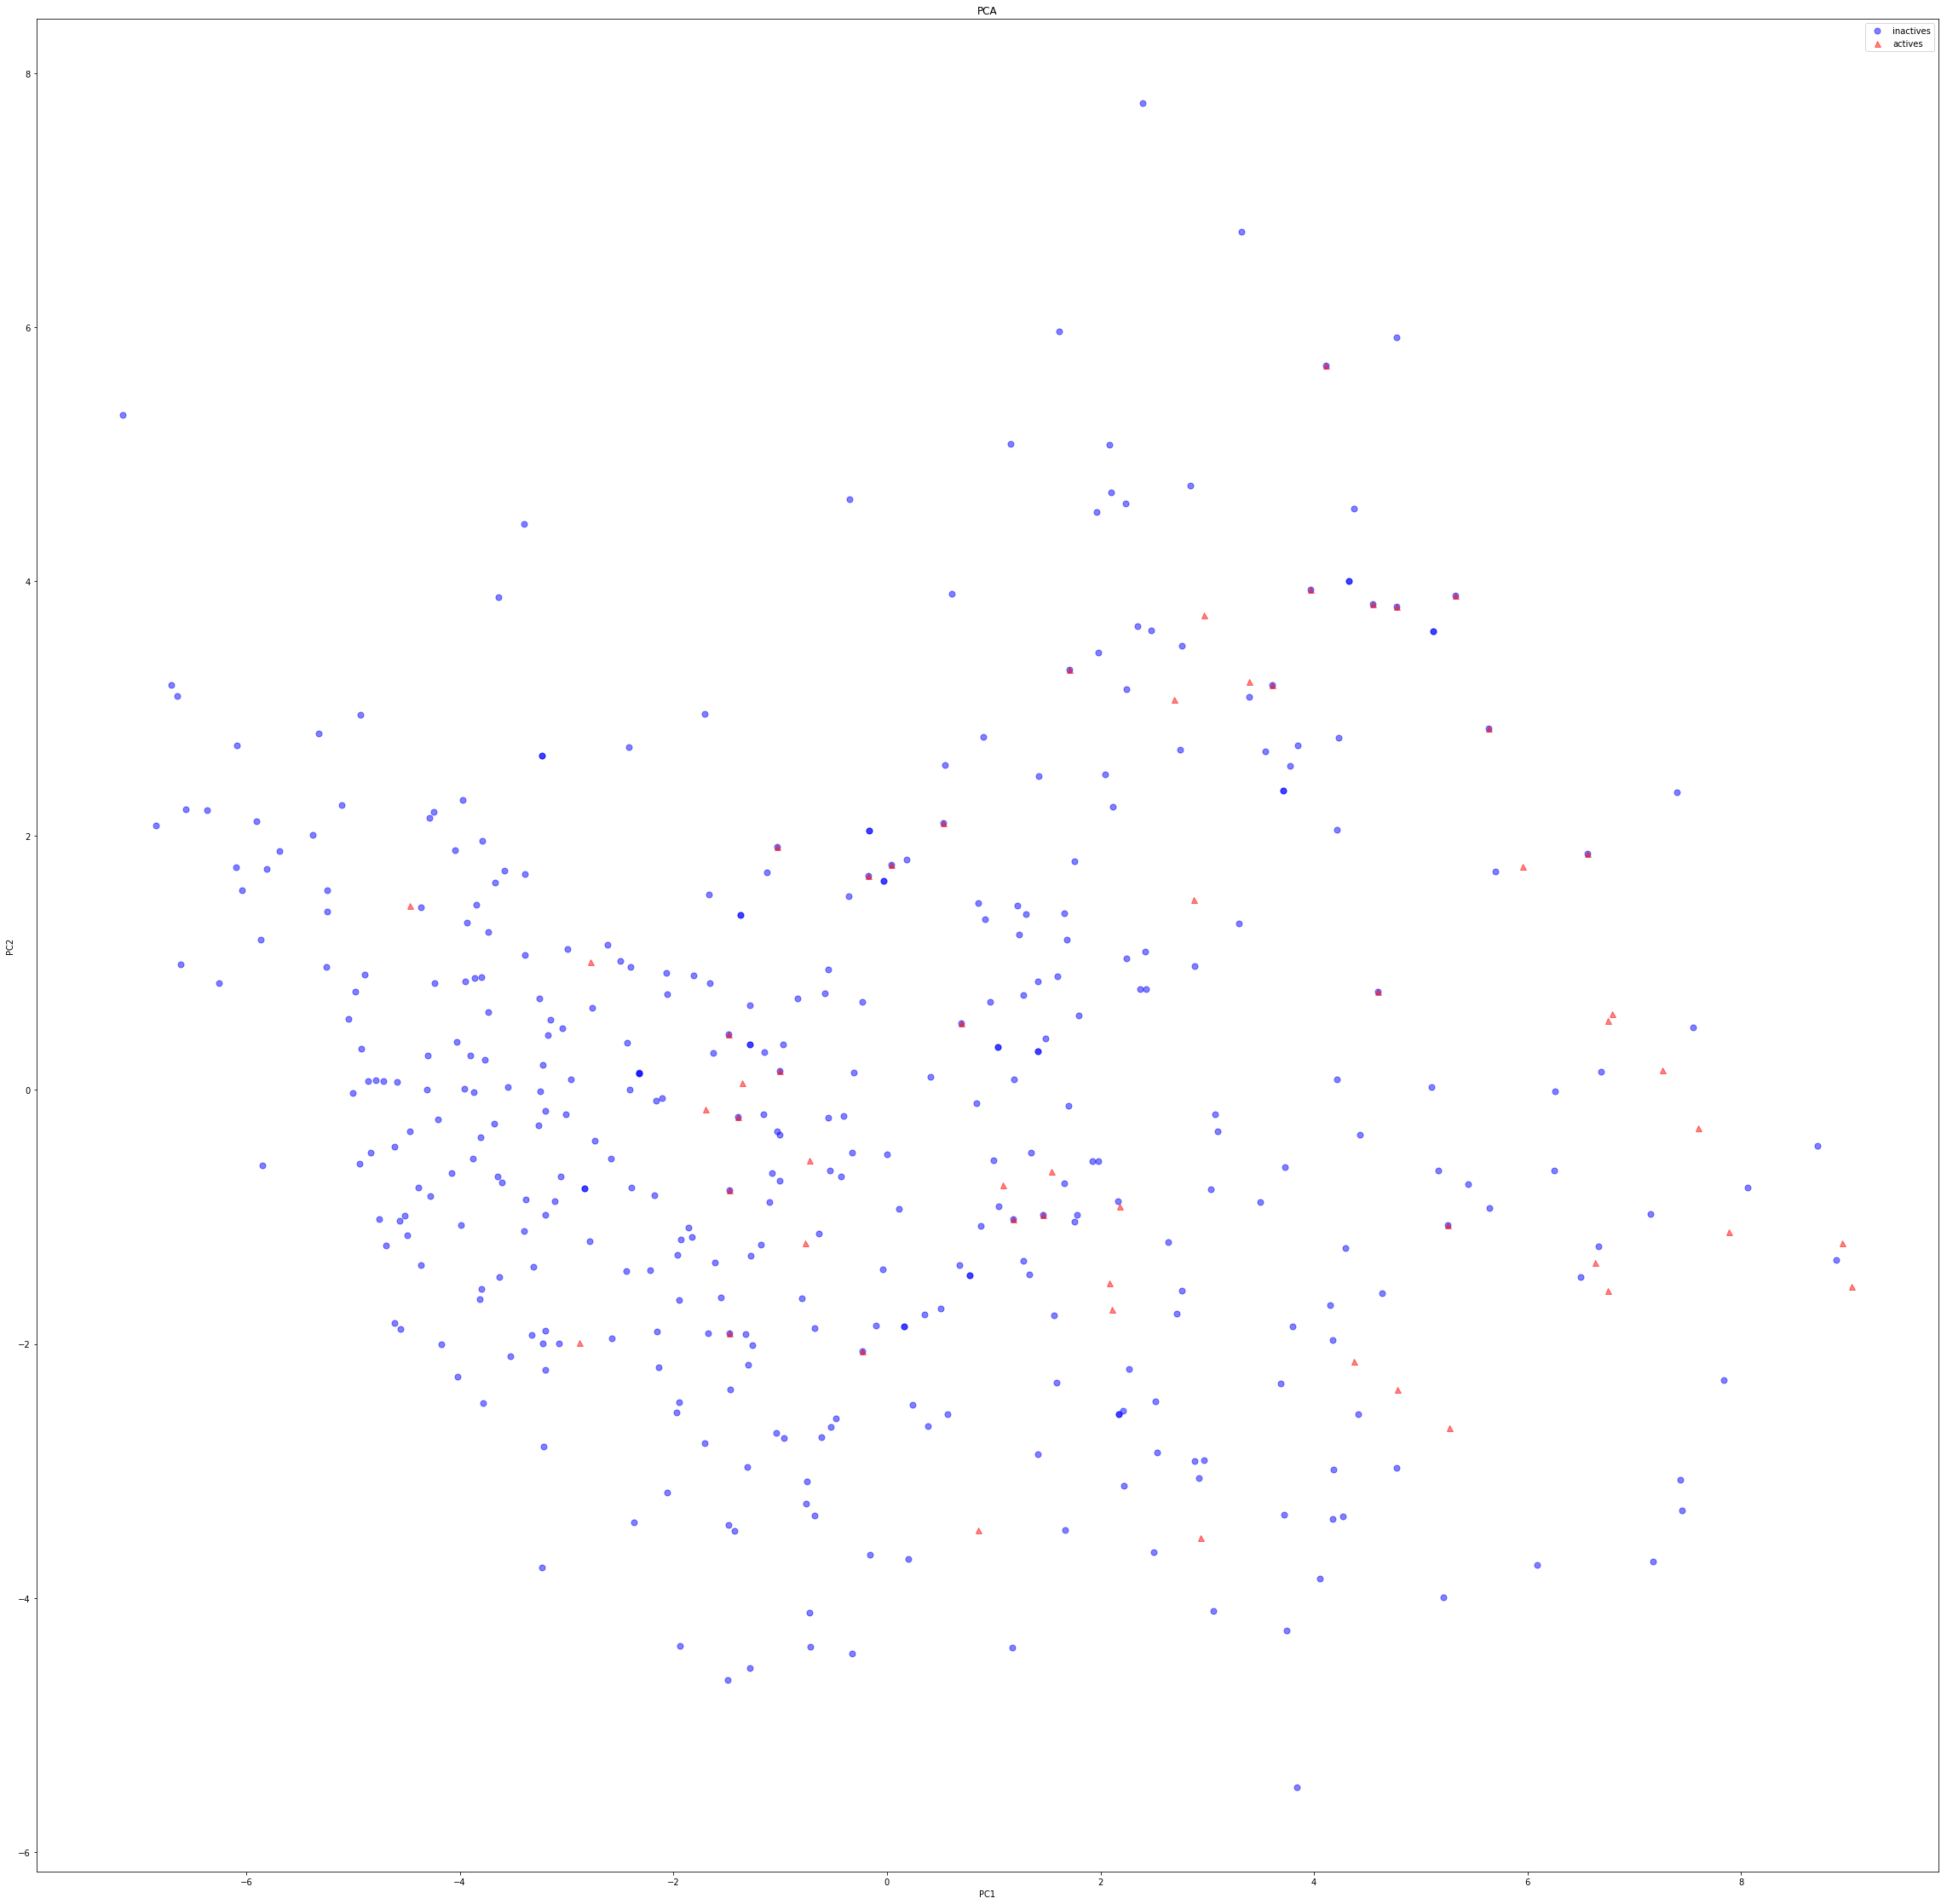

In [198]:
pca = PCA(n_components=2)
    
pc_tr = pca.fit_transform(npdesc)
    
print("Explained variance by principal components are %s" % pca.explained_variance_ratio_)
pca_tr_l = np.concatenate((pc_tr, labdesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='inactives')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='actives')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()

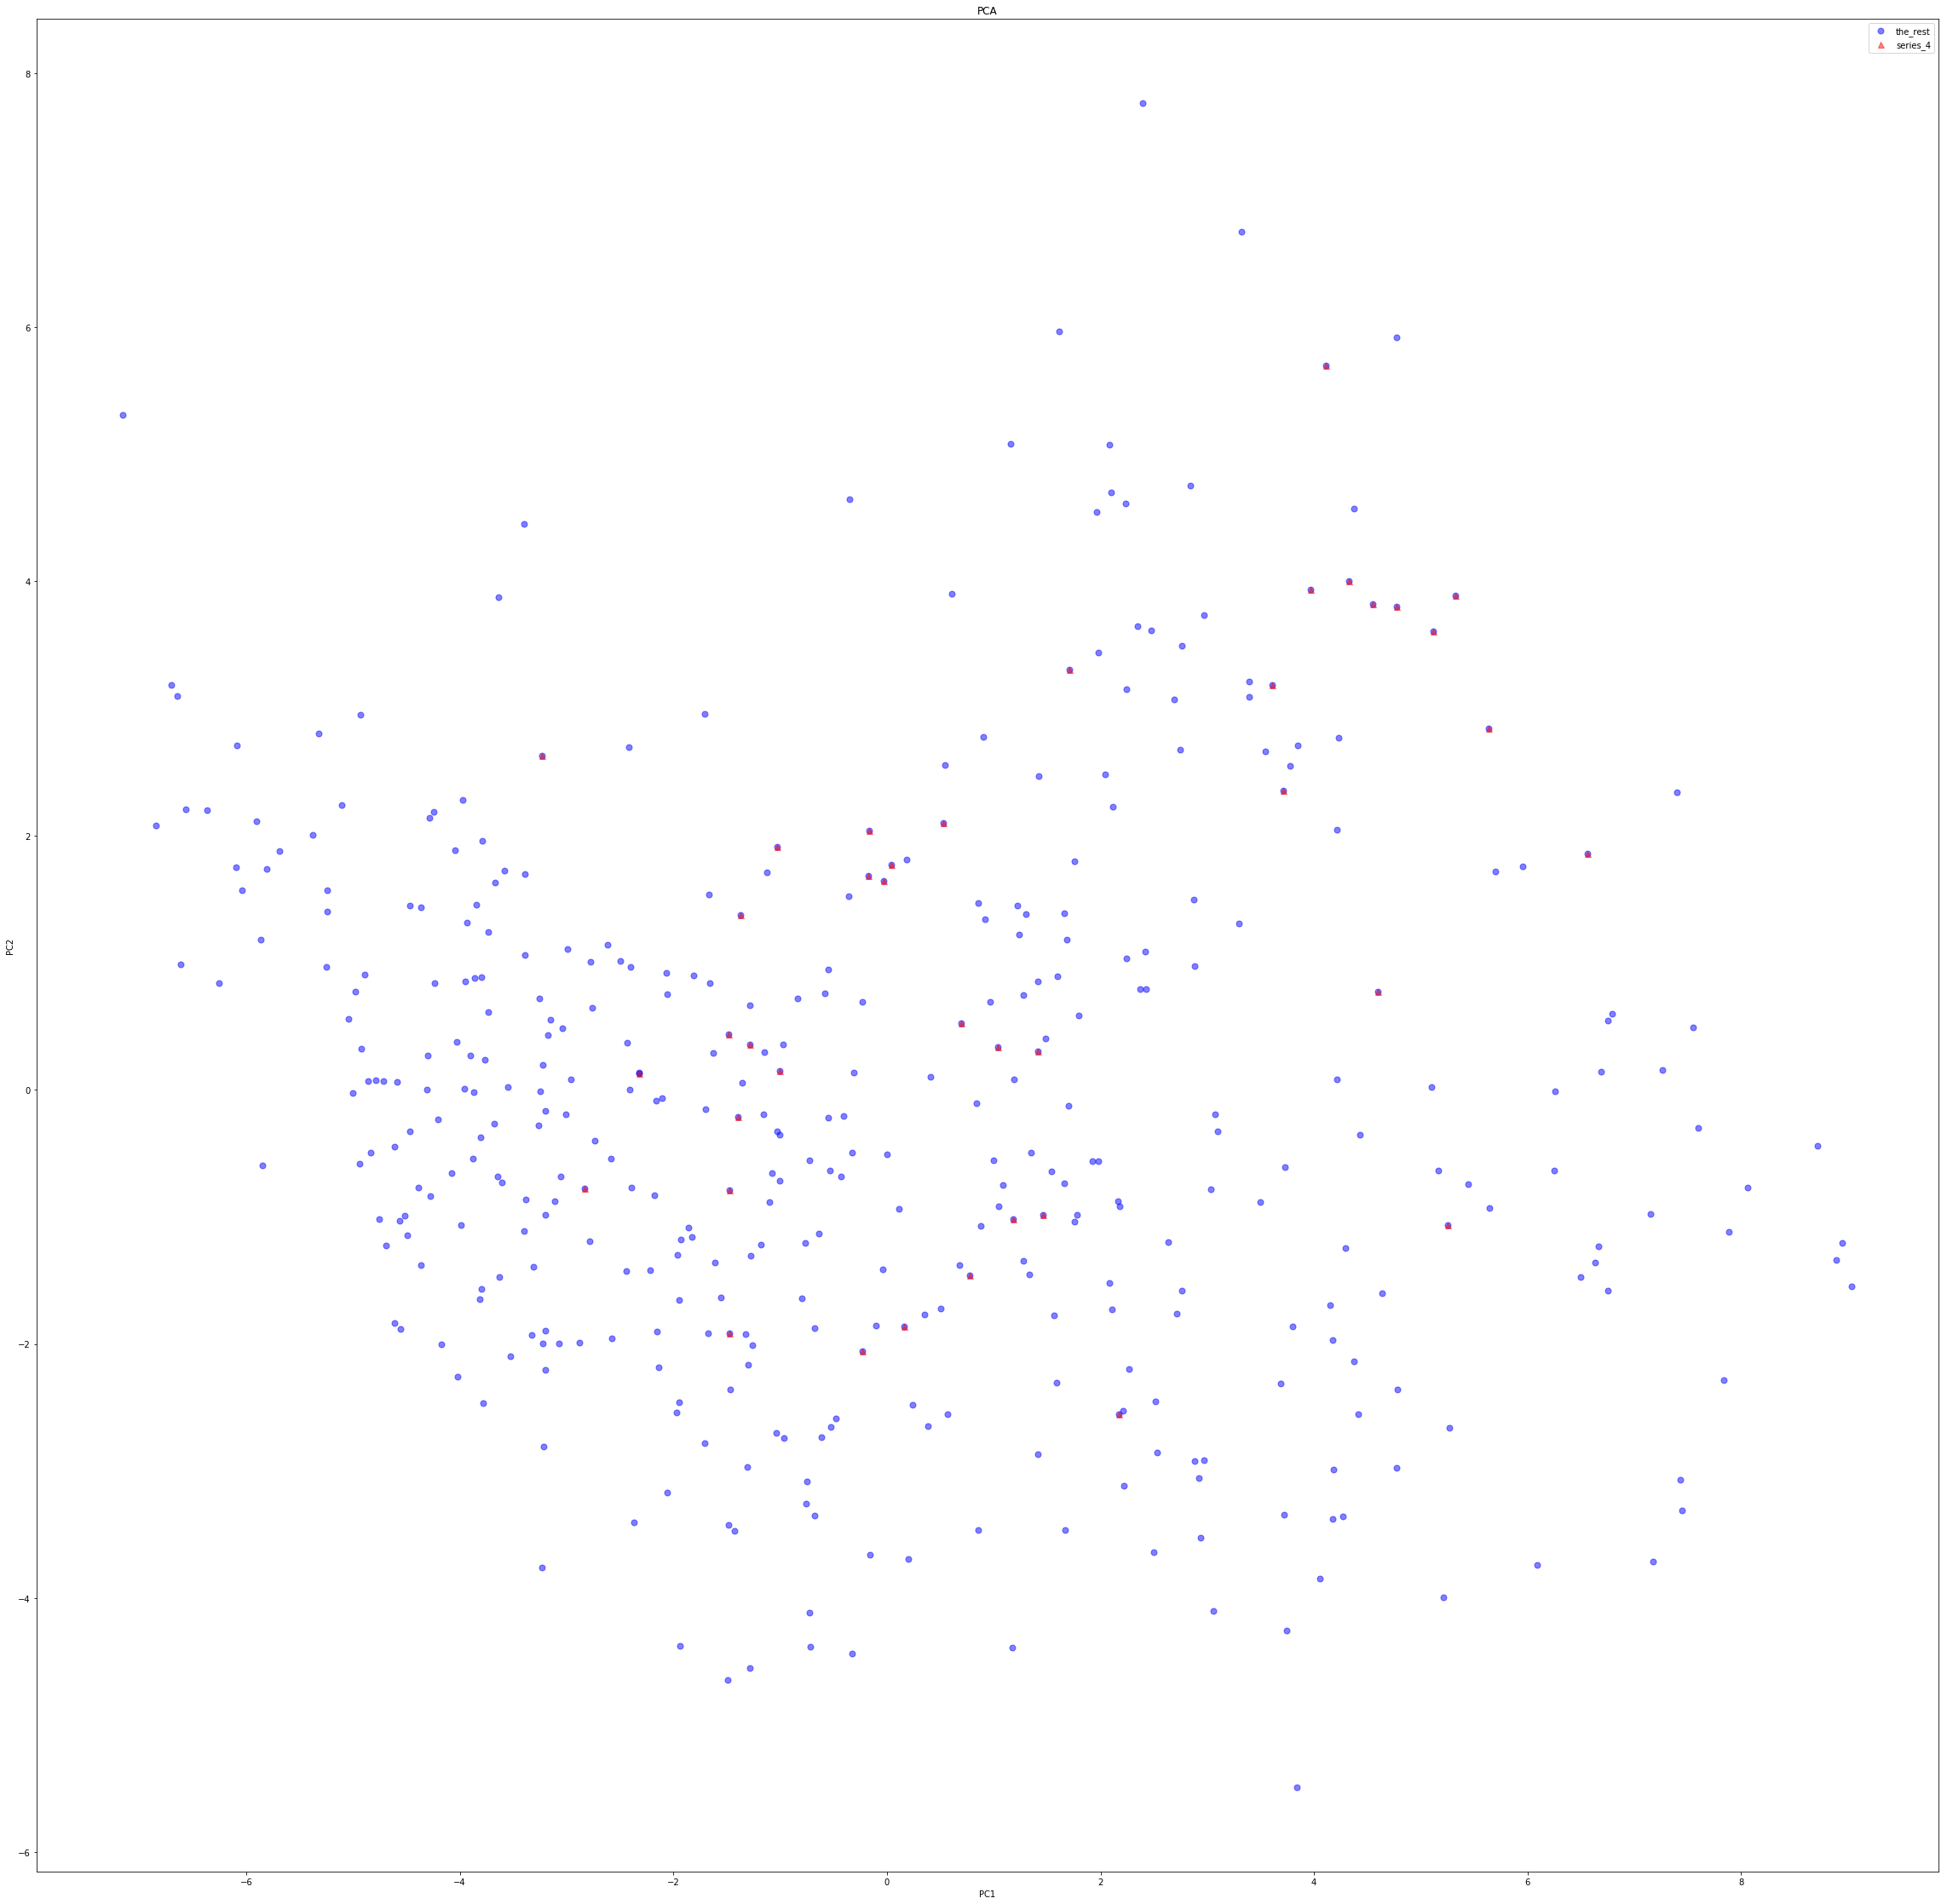

In [199]:
pca_tr_l = np.concatenate((pc_tr, typedesc[:, None]), axis=1) 
plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='the_rest')
plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='series_4')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.legend()
plt.title('PCA')

plt.show()